# Kalp Hastalƒ±ƒüƒ± Tahmin Projesi - Makine √ñƒürenmesi Modelleri Kar≈üƒ±la≈ütƒ±rmasƒ±

## Proje Amacƒ±
Bu projede, Kaggle √ºzerinden eri≈üilebilen Heart Failure Prediction Dataset kullanƒ±larak kalp hastalƒ±ƒüƒ± riskini tahmin eden makine √∂ƒürenmesi modelleri geli≈ütirilmektedir. √áe≈üitli algoritmalarƒ±n (Random Forest, Decision Tree, k-Nearest Neighbor, Gaussian Naive Bayes) performanslarƒ± kar≈üƒ±la≈ütƒ±rƒ±larak en iyi tahmin modeli belirlenecektir.

## Veri Seti
Veri seti a≈üaƒüƒ±daki klinik √∂zellikleri i√ßermektedir:
- Ya≈ü, cinsiyet, g√∂ƒü√ºs aƒürƒ±sƒ± tipi
- Dinlenme kan basƒ±ncƒ±, kolesterol seviyesi
- A√ßlƒ±k kan ≈üekeri, EKG sonu√ßlarƒ±
- Maksimum kalp atƒ±≈ü hƒ±zƒ±
- Egzersiz sƒ±rasƒ±nda anjina
- ST depresyonu ve ST segment eƒüimi

## Ara≈ütƒ±rma Sorularƒ±
1. Makine √∂ƒürenmesi algoritmalarƒ± ile kalp yetmezliƒüi riski doƒüru tahmin edilebilir mi?
2. Hangi model en y√ºksek performansƒ± g√∂sterir?
3. Random Forest tabanlƒ± modeller diƒüer modellere g√∂re daha iyi performans g√∂sterir mi?

## 1. Gerekli K√ºt√ºphanelerin Y√ºklenmesi ve ƒ∞√ße Aktarƒ±lmasƒ±

Bu b√∂l√ºmde projede kullanƒ±lacak t√ºm k√ºt√ºphaneleri y√ºkleyeceƒüiz.

In [114]:
# Veri i≈üleme ve analiz i√ßin temel k√ºt√ºphaneler
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# G√∂rselle≈ütirme k√ºt√ºphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Makine √∂ƒürenmesi k√ºt√ºphaneleri
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Model deƒüerlendirme metrikleri
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Grafik ayarlarƒ±
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("T√ºm k√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!")

T√ºm k√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!


## 2. Veri K√ºmesinin Y√ºklenmesi

Heart Failure Prediction Dataset'i y√ºkleyeceƒüiz. Bu veri seti Kaggle √ºzerinden indirilebilir.
**Not:** Veri setini √∂nce Kaggle'dan indirip proje klas√∂r√ºne kaydetmeniz gerekmektedir.

In [115]:
# Veri k√ºmesini y√ºkleme
try:
    # √ñnce yerel dosyadan y√ºklemeyi deneyin
    df = pd.read_csv('heart.csv')
    print("Veri seti ba≈üarƒ±yla yerel dosyadan y√ºklendi!")
except FileNotFoundError:
    raise Exception("heart.csv dosyasƒ± bulunamadƒ±. Kaggle'dan indirip proje klas√∂r√ºne kaydetmeniz gerekmektedir.")

print(f"Veri seti boyutu: {df.shape}")
print(f"Satƒ±r sayƒ±sƒ±: {df.shape[0]}, S√ºtun sayƒ±sƒ±: {df.shape[1]}")

Veri seti ba≈üarƒ±yla yerel dosyadan y√ºklendi!
Veri seti boyutu: (918, 12)
Satƒ±r sayƒ±sƒ±: 918, S√ºtun sayƒ±sƒ±: 12


## 3. Veri K√ºmesinin ƒ∞lk ƒ∞ncelemesi

Veri setinin genel yapƒ±sƒ±nƒ±, deƒüi≈üken tiplerini ve temel istatistikleri inceleyeceƒüiz.

In [116]:
# Veri setinin ilk birka√ß satƒ±rƒ±nƒ± g√∂r√ºnt√ºleme
print("=== VERƒ∞ SETƒ∞Nƒ∞N ƒ∞LK 5 SATIRI ===")
print(df.head())

print("\n=== VERƒ∞ SETƒ∞ HAKKINDA GENEL Bƒ∞LGƒ∞LER ===")
print(df.info())

print("\n=== S√úTUN ADLARƒ∞ ===")
print(df.columns.tolist())

print("\n=== VERƒ∞ Tƒ∞PLERƒ∞ ===")
print(df.dtypes)

print("\n=== VERƒ∞ SETƒ∞Nƒ∞N BOYUTU ===")
print(f"Satƒ±r sayƒ±sƒ±: {df.shape[0]}")
print(f"S√ºtun sayƒ±sƒ±: {df.shape[1]}")

print("\n=== HEDEF DEƒûƒ∞≈ûKENƒ∞N DAƒûILIMI ===")
print(df['HeartDisease'].value_counts())
print(f"Kalp hastalƒ±ƒüƒ± oranƒ±: %{(df['HeartDisease'].sum() / len(df) * 100):.1f}")

=== VERƒ∞ SETƒ∞Nƒ∞N ƒ∞LK 5 SATIRI ===
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

=== VERƒ∞ SETƒ∞ HAKKINDA GENEL Bƒ∞LGƒ∞LER ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column      

In [117]:
# Sayƒ±sal deƒüi≈ükenler i√ßin temel istatistikler
print("=== SAYISAL DEƒûƒ∞≈ûKENLER ƒ∞√áƒ∞N TEMEL ƒ∞STATƒ∞STƒ∞KLER ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df[numeric_columns].describe())

print("\n=== KATEGORƒ∞K DEƒûƒ∞≈ûKENLER ƒ∞√áƒ∞N BENZERSIZ DEƒûERLER ===")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")
    print(f"Benzersiz deƒüer sayƒ±sƒ±: {df[col].nunique()}")
    print(f"Deƒüer daƒüƒ±lƒ±mƒ±:\n{df[col].value_counts()}\n")

=== SAYISAL DEƒûƒ∞≈ûKENLER ƒ∞√áƒ∞N TEMEL ƒ∞STATƒ∞STƒ∞KLER ===
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  



## 4. Eksik ve Aykƒ±rƒ± Deƒüerlerin Analizi ve Temizlenmesi

Bu b√∂l√ºmde eksik deƒüerleri tespit edip uygun ≈üekilde i≈üleyeceƒüiz ve aykƒ±rƒ± deƒüerleri analiz edeceƒüiz.

In [118]:
# Eksik deƒüerlerin kontrol√º
print("=== EKSƒ∞K DEƒûER ANALƒ∞Zƒ∞ ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'S√ºtun': missing_values.index,
    'Eksik Deƒüer Sayƒ±sƒ±': missing_values.values,
    'Y√ºzde (%)': missing_percentage.values
}).sort_values('Eksik Deƒüer Sayƒ±sƒ±', ascending=False)

print(missing_df)

# Sƒ±fƒ±r deƒüerlerin kontrol√º (√∂zellikle Cholesterol ve RestingBP i√ßin)
print("\n=== SIFIR DEƒûER ANALƒ∞Zƒ∞ ===")
zero_values = {}
for col in ['RestingBP', 'Cholesterol']:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        zero_values[col] = zero_count
        print(f"{col}: {zero_count} adet sƒ±fƒ±r deƒüer (%{(zero_count/len(df)*100):.1f})")

# Sƒ±fƒ±r deƒüerleri NaN ile deƒüi≈ütirme (medikal a√ßƒ±dan mantƒ±ksƒ±z)
df_cleaned = df.copy()
for col in ['RestingBP', 'Cholesterol']:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].replace(0, np.nan)
        
print(f"\nTemizleme sonrasƒ± eksik deƒüerler:")
print(df_cleaned.isnull().sum())

=== EKSƒ∞K DEƒûER ANALƒ∞Zƒ∞ ===
             S√ºtun  Eksik Deƒüer Sayƒ±sƒ±  Y√ºzde (%)
0              Age                   0        0.0
1              Sex                   0        0.0
2    ChestPainType                   0        0.0
3        RestingBP                   0        0.0
4      Cholesterol                   0        0.0
5        FastingBS                   0        0.0
6       RestingECG                   0        0.0
7            MaxHR                   0        0.0
8   ExerciseAngina                   0        0.0
9          Oldpeak                   0        0.0
10        ST_Slope                   0        0.0
11    HeartDisease                   0        0.0

=== SIFIR DEƒûER ANALƒ∞Zƒ∞ ===
RestingBP: 1 adet sƒ±fƒ±r deƒüer (%0.1)
Cholesterol: 172 adet sƒ±fƒ±r deƒüer (%18.7)

Temizleme sonrasƒ± eksik deƒüerler:
Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR

RestingBP s√ºtunundaki eksik deƒüerler medyan (130.0) ile dolduruldu.
Cholesterol s√ºtunundaki eksik deƒüerler medyan (237.0) ile dolduruldu.

Eksik deƒüer doldurma sonrasƒ± durum:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


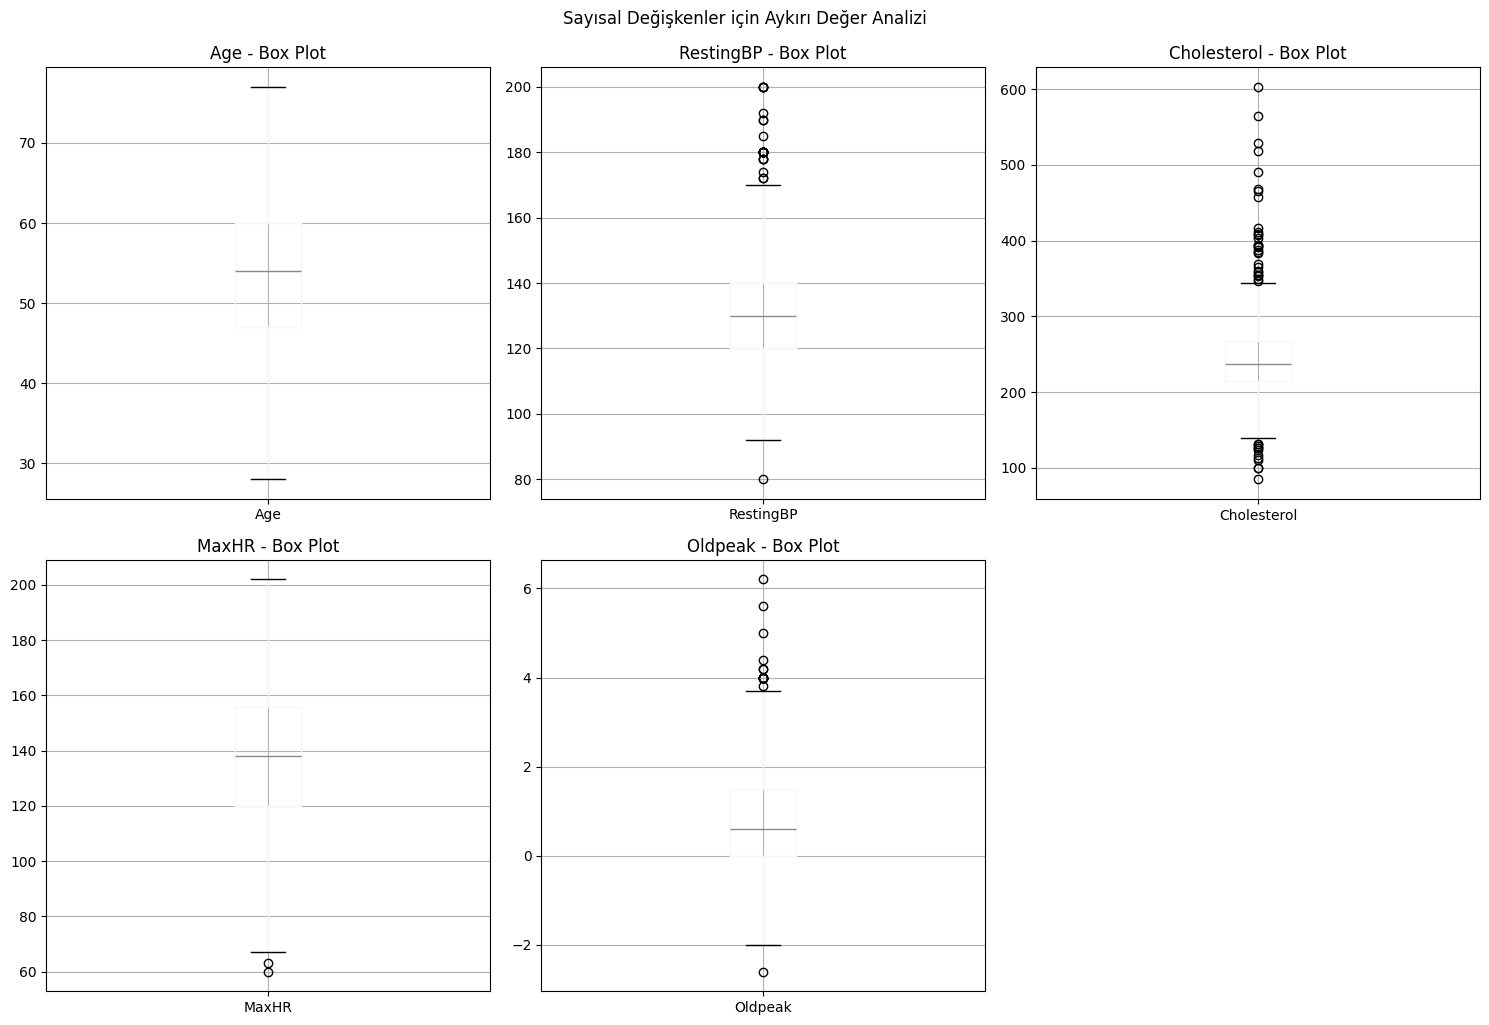


=== AYKIR√é DEƒûER TESPƒ∞Tƒ∞ (IQR Y√ñNTEMƒ∞) ===
Age: 0 aykƒ±rƒ± deƒüer (%0.0)
  Alt sƒ±nƒ±r: 27.5, √úst sƒ±nƒ±r: 79.5
RestingBP: 27 aykƒ±rƒ± deƒüer (%2.9)
  Alt sƒ±nƒ±r: 90.0, √úst sƒ±nƒ±r: 170.0
Cholesterol: 41 aykƒ±rƒ± deƒüer (%4.5)
  Alt sƒ±nƒ±r: 134.5, √úst sƒ±nƒ±r: 346.5
MaxHR: 2 aykƒ±rƒ± deƒüer (%0.2)
  Alt sƒ±nƒ±r: 66.0, √úst sƒ±nƒ±r: 210.0
Oldpeak: 16 aykƒ±rƒ± deƒüer (%1.7)
  Alt sƒ±nƒ±r: -2.2, √úst sƒ±nƒ±r: 3.8

Temizlenmi≈ü veri seti boyutu: (918, 12)


In [119]:
# Eksik deƒüerleri medyan ile doldurma
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)
        print(f"{col} s√ºtunundaki eksik deƒüerler medyan ({median_value:.1f}) ile dolduruldu.")

print("\nEksik deƒüer doldurma sonrasƒ± durum:")
print(df_cleaned.isnull().sum())

# Aykƒ±rƒ± deƒüer analizi - Box plot ile g√∂rselle≈ütirme
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
existing_cols = [col for col in numeric_cols if col in df_cleaned.columns]

if existing_cols:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(existing_cols):
        if i < len(axes):
            df_cleaned.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'{col} - Box Plot')
            axes[i].grid(True)
    
    # Bo≈ü subplot'larƒ± gizle
    for i in range(len(existing_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Sayƒ±sal Deƒüi≈ükenler i√ßin Aykƒ±rƒ± Deƒüer Analizi', y=1.02)
    plt.show()

# IQR y√∂ntemi ile aykƒ±rƒ± deƒüer tespiti
print("\n=== AYKIR√é DEƒûER TESPƒ∞Tƒ∞ (IQR Y√ñNTEMƒ∞) ===")
for col in existing_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col}: {len(outliers)} aykƒ±rƒ± deƒüer (%{len(outliers)/len(df_cleaned)*100:.1f})")
    print(f"  Alt sƒ±nƒ±r: {lower_bound:.1f}, √úst sƒ±nƒ±r: {upper_bound:.1f}")

print(f"\nTemizlenmi≈ü veri seti boyutu: {df_cleaned.shape}")

## 5. Veri D√∂n√º≈üt√ºrme ve √ñzellik M√ºhendisliƒüi

Kategorik deƒüi≈ükenleri sayƒ±sal hale getireceƒüiz ve gerekirse yeni √∂zellikler olu≈üturacaƒüƒ±z.

In [120]:
# Kategorik deƒüi≈ükenleri sayƒ±sal hale getirme
df_encoded = df_cleaned.copy()

print("=== KATEGORƒ∞K DEƒûƒ∞≈ûKEN D√ñN√ú≈ûT√úRME ===")

# Label Encoding i√ßin kategorik s√ºtunlarƒ± belirleme
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
print(f"Kategorik s√ºtunlar: {list(categorical_columns)}")

# Label Encoder olu≈üturma
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"{col} s√ºtunu sayƒ±sal hale getirildi:")
    print(f"  Orijinal deƒüerler: {list(le.classes_)}")
    print(f"  Kodlanmƒ±≈ü deƒüerler: {list(range(len(le.classes_)))}")

# One-hot encoding alternatifi (isteƒüe baƒülƒ±)
print("\n=== ONE-HOT ENCODƒ∞NG ALTERNATƒ∞Fƒ∞ ===")
df_onehot = pd.get_dummies(df_cleaned, columns=categorical_columns, prefix=categorical_columns)
print(f"One-hot encoding sonrasƒ± s√ºtun sayƒ±sƒ±: {df_onehot.shape[1]}")
print(f"Yeni s√ºtunlar: {[col for col in df_onehot.columns if col not in df_cleaned.columns]}")

# Ana veri seti olarak label encoded versiyonu kullanacaƒüƒ±z
print(f"\nD√∂n√º≈üt√ºr√ºlm√º≈ü veri seti boyutu: {df_encoded.shape}")
print(f"Veri tipleri:")
print(df_encoded.dtypes)

=== KATEGORƒ∞K DEƒûƒ∞≈ûKEN D√ñN√ú≈ûT√úRME ===
Kategorik s√ºtunlar: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Sex s√ºtunu sayƒ±sal hale getirildi:
  Orijinal deƒüerler: ['F', 'M']
  Kodlanmƒ±≈ü deƒüerler: [0, 1]
ChestPainType s√ºtunu sayƒ±sal hale getirildi:
  Orijinal deƒüerler: ['ASY', 'ATA', 'NAP', 'TA']
  Kodlanmƒ±≈ü deƒüerler: [0, 1, 2, 3]
RestingECG s√ºtunu sayƒ±sal hale getirildi:
  Orijinal deƒüerler: ['LVH', 'Normal', 'ST']
  Kodlanmƒ±≈ü deƒüerler: [0, 1, 2]
ExerciseAngina s√ºtunu sayƒ±sal hale getirildi:
  Orijinal deƒüerler: ['N', 'Y']
  Kodlanmƒ±≈ü deƒüerler: [0, 1]
ST_Slope s√ºtunu sayƒ±sal hale getirildi:
  Orijinal deƒüerler: ['Down', 'Flat', 'Up']
  Kodlanmƒ±≈ü deƒüerler: [0, 1, 2]

=== ONE-HOT ENCODƒ∞NG ALTERNATƒ∞Fƒ∞ ===
One-hot encoding sonrasƒ± s√ºtun sayƒ±sƒ±: 21
Yeni s√ºtunlar: ['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'Exerc

In [121]:
# √ñzellik m√ºhendisliƒüi - Yeni √∂zellikler olu≈üturma
print("=== YENƒ∞ √ñZELLƒ∞K OLU≈ûTURMA ===")

# Ya≈ü kategorileri
if 'Age' in df_encoded.columns:
    df_encoded['AgeGroup'] = pd.cut(df_encoded['Age'], 
                                   bins=[0, 40, 55, 70, 100], 
                                   labels=[0, 1, 2, 3])  # 0: Gen√ß, 1: Orta ya≈ü, 2: Ya≈ülƒ±, 3: ƒ∞leri ya≈ü
    print("AgeGroup √∂zelliƒüi olu≈üturuldu")

# Kan basƒ±ncƒ± kategorileri
if 'RestingBP' in df_encoded.columns:
    df_encoded['BPCategory'] = pd.cut(df_encoded['RestingBP'], 
                                     bins=[0, 120, 140, 180, 300], 
                                     labels=[0, 1, 2, 3])  # 0: Normal, 1: Y√ºksek-normal, 2: Hipertansiyon, 3: ≈ûiddetli
    print("BPCategory √∂zelliƒüi olu≈üturuldu")

# Kolesterol kategorileri
if 'Cholesterol' in df_encoded.columns:
    df_encoded['CholesterolCategory'] = pd.cut(df_encoded['Cholesterol'], 
                                              bins=[0, 200, 240, 600], 
                                              labels=[0, 1, 2])  # 0: ƒ∞yi, 1: Sƒ±nƒ±rda, 2: Y√ºksek
    print("CholesterolCategory √∂zelliƒüi olu≈üturuldu")

# Kalp atƒ±≈ü hƒ±zƒ± kategorileri
if 'MaxHR' in df_encoded.columns:
    df_encoded['HRCategory'] = pd.cut(df_encoded['MaxHR'], 
                                     bins=[0, 120, 150, 220], 
                                     labels=[0, 1, 2])  # 0: D√º≈ü√ºk, 1: Normal, 2: Y√ºksek
    print("HRCategory √∂zelliƒüi olu≈üturuldu")

# Risk skoru (basit bir kombinasyon)
risk_features = []
if all(col in df_encoded.columns for col in ['Age', 'RestingBP', 'Cholesterol']):
    # Normalle≈ütirme
    age_norm = (df_encoded['Age'] - df_encoded['Age'].min()) / (df_encoded['Age'].max() - df_encoded['Age'].min())
    bp_norm = (df_encoded['RestingBP'] - df_encoded['RestingBP'].min()) / (df_encoded['RestingBP'].max() - df_encoded['RestingBP'].min())
    chol_norm = (df_encoded['Cholesterol'] - df_encoded['Cholesterol'].min()) / (df_encoded['Cholesterol'].max() - df_encoded['Cholesterol'].min())
    
    df_encoded['RiskScore'] = (age_norm * 0.3 + bp_norm * 0.35 + chol_norm * 0.35)
    print("RiskScore √∂zelliƒüi olu≈üturuldu")

print(f"\nYeni √∂zellikler eklendikten sonra veri seti boyutu: {df_encoded.shape}")
print(f"Yeni s√ºtunlar: {[col for col in df_encoded.columns if col not in df_cleaned.columns]}")

=== YENƒ∞ √ñZELLƒ∞K OLU≈ûTURMA ===
AgeGroup √∂zelliƒüi olu≈üturuldu
BPCategory √∂zelliƒüi olu≈üturuldu
CholesterolCategory √∂zelliƒüi olu≈üturuldu
HRCategory √∂zelliƒüi olu≈üturuldu
RiskScore √∂zelliƒüi olu≈üturuldu

Yeni √∂zellikler eklendikten sonra veri seti boyutu: (918, 17)
Yeni s√ºtunlar: ['AgeGroup', 'BPCategory', 'CholesterolCategory', 'HRCategory', 'RiskScore']


## 6. Ke≈üifsel Veri Analizi (EDA)

Bu b√∂l√ºmde veri setini g√∂rsel olarak analiz edeceƒüiz ve deƒüi≈ükenler arasƒ±ndaki ili≈ükileri ke≈üfedeceƒüiz.

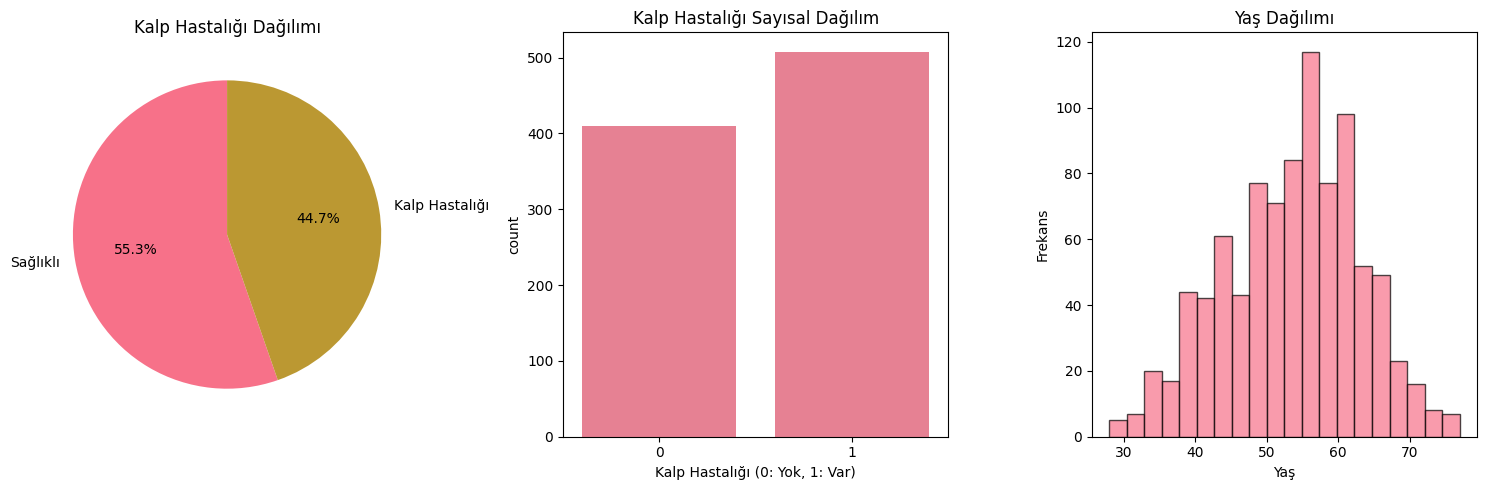

=== HEDEF DEƒûƒ∞≈ûKEN ƒ∞STATƒ∞STƒ∞KLERƒ∞ ===
Toplam g√∂zlem sayƒ±sƒ±: 918
Kalp hastalƒ±ƒüƒ± olan: 508 (%55.3)
Kalp hastalƒ±ƒüƒ± olmayan: 410 (%44.7)


In [122]:
# Hedef deƒüi≈ükenin daƒüƒ±lƒ±mƒ±
plt.figure(figsize=(15, 5))

# Hedef deƒüi≈üken daƒüƒ±lƒ±mƒ±
plt.subplot(1, 3, 1)
target_counts = df_encoded['HeartDisease'].value_counts()
plt.pie(target_counts.values, labels=['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±'], autopct='%1.1f%%', startangle=90)
plt.title('Kalp Hastalƒ±ƒüƒ± Daƒüƒ±lƒ±mƒ±')

plt.subplot(1, 3, 2)
sns.countplot(data=df_encoded, x='HeartDisease')
plt.title('Kalp Hastalƒ±ƒüƒ± Sayƒ±sal Daƒüƒ±lƒ±m')
plt.xlabel('Kalp Hastalƒ±ƒüƒ± (0: Yok, 1: Var)')

# Ya≈ü daƒüƒ±lƒ±mƒ±
plt.subplot(1, 3, 3)
plt.hist(df_encoded['Age'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Ya≈ü Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Ya≈ü')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

print("=== HEDEF DEƒûƒ∞≈ûKEN ƒ∞STATƒ∞STƒ∞KLERƒ∞ ===")
print(f"Toplam g√∂zlem sayƒ±sƒ±: {len(df_encoded)}")
print(f"Kalp hastalƒ±ƒüƒ± olan: {target_counts[1]} (%{target_counts[1]/len(df_encoded)*100:.1f})")
print(f"Kalp hastalƒ±ƒüƒ± olmayan: {target_counts[0]} (%{target_counts[0]/len(df_encoded)*100:.1f})")

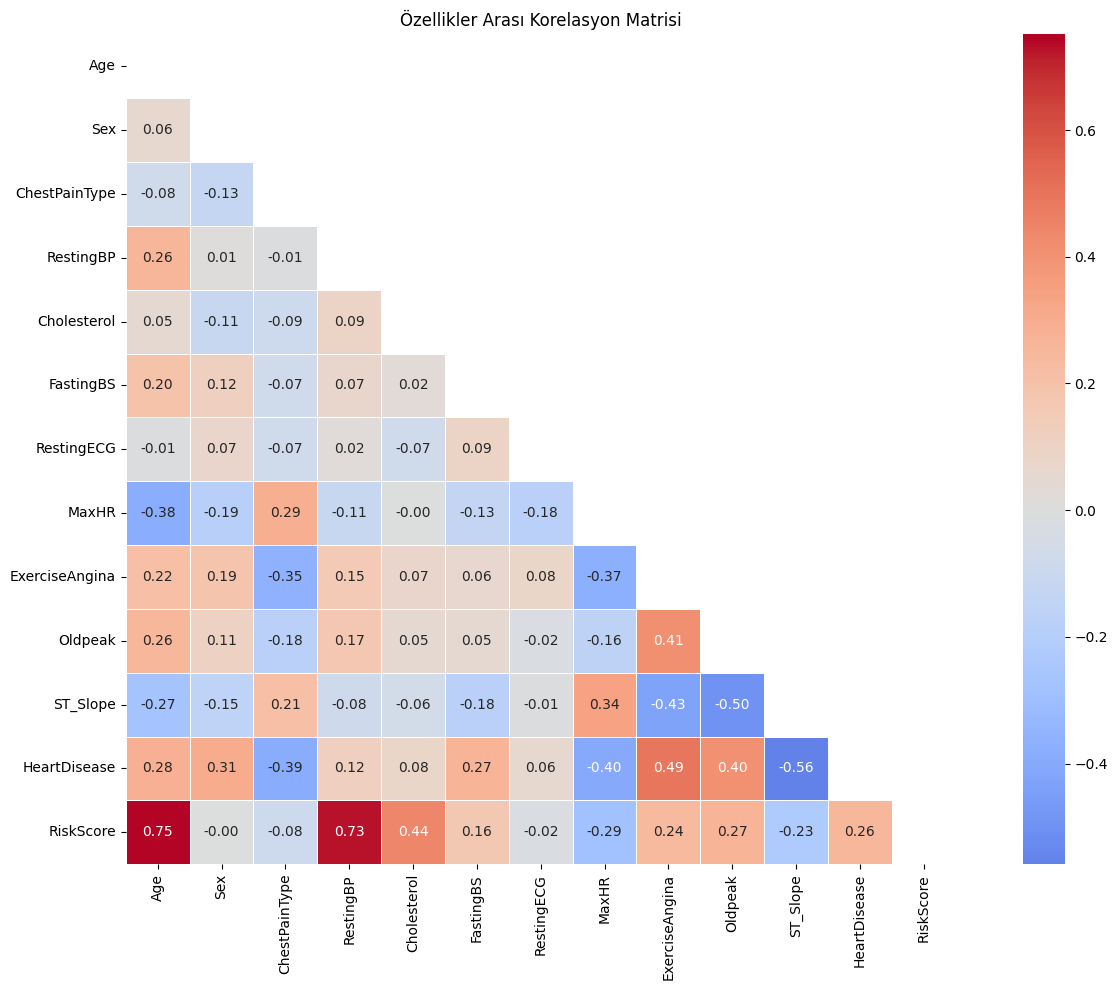

=== HEDEF DEƒûƒ∞≈ûKENLE EN Y√úKSEK KORELASYON ===
HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RiskScore         0.258700
Name: HeartDisease, dtype: float64

=== EN Y√úKSEK KORELASYONLU √ñZELLƒ∞K √áƒ∞FTLERƒ∞ ===
Age - RiskScore: 0.751
RestingBP - RiskScore: 0.726
ST_Slope - HeartDisease: -0.559
Oldpeak - ST_Slope: -0.502
ExerciseAngina - HeartDisease: 0.494
Cholesterol - RiskScore: 0.444
ExerciseAngina - ST_Slope: -0.429
ExerciseAngina - Oldpeak: 0.409
Oldpeak - HeartDisease: 0.404
MaxHR - HeartDisease: -0.400


In [123]:
# Korelasyon matrisi
plt.figure(figsize=(14, 10))

# Sadece sayƒ±sal s√ºtunlarƒ± se√ß
numeric_df = df_encoded.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Heatmap olu≈ütur
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('√ñzellikler Arasƒ± Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# Hedef deƒüi≈ükenle en y√ºksek korelasyona sahip √∂zellikler
target_correlation = correlation_matrix['HeartDisease'].abs().sort_values(ascending=False)
print("=== HEDEF DEƒûƒ∞≈ûKENLE EN Y√úKSEK KORELASYON ===")
print(target_correlation.head(10))

# En y√ºksek korelasyonlu √∂zellikler
print("\n=== EN Y√úKSEK KORELASYONLU √ñZELLƒ∞K √áƒ∞FTLERƒ∞ ===")
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:  # 0.3'ten y√ºksek korelasyon
            correlation_pairs.append((correlation_matrix.columns[i], 
                                    correlation_matrix.columns[j], 
                                    corr_val))

correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for pair in correlation_pairs[:10]:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

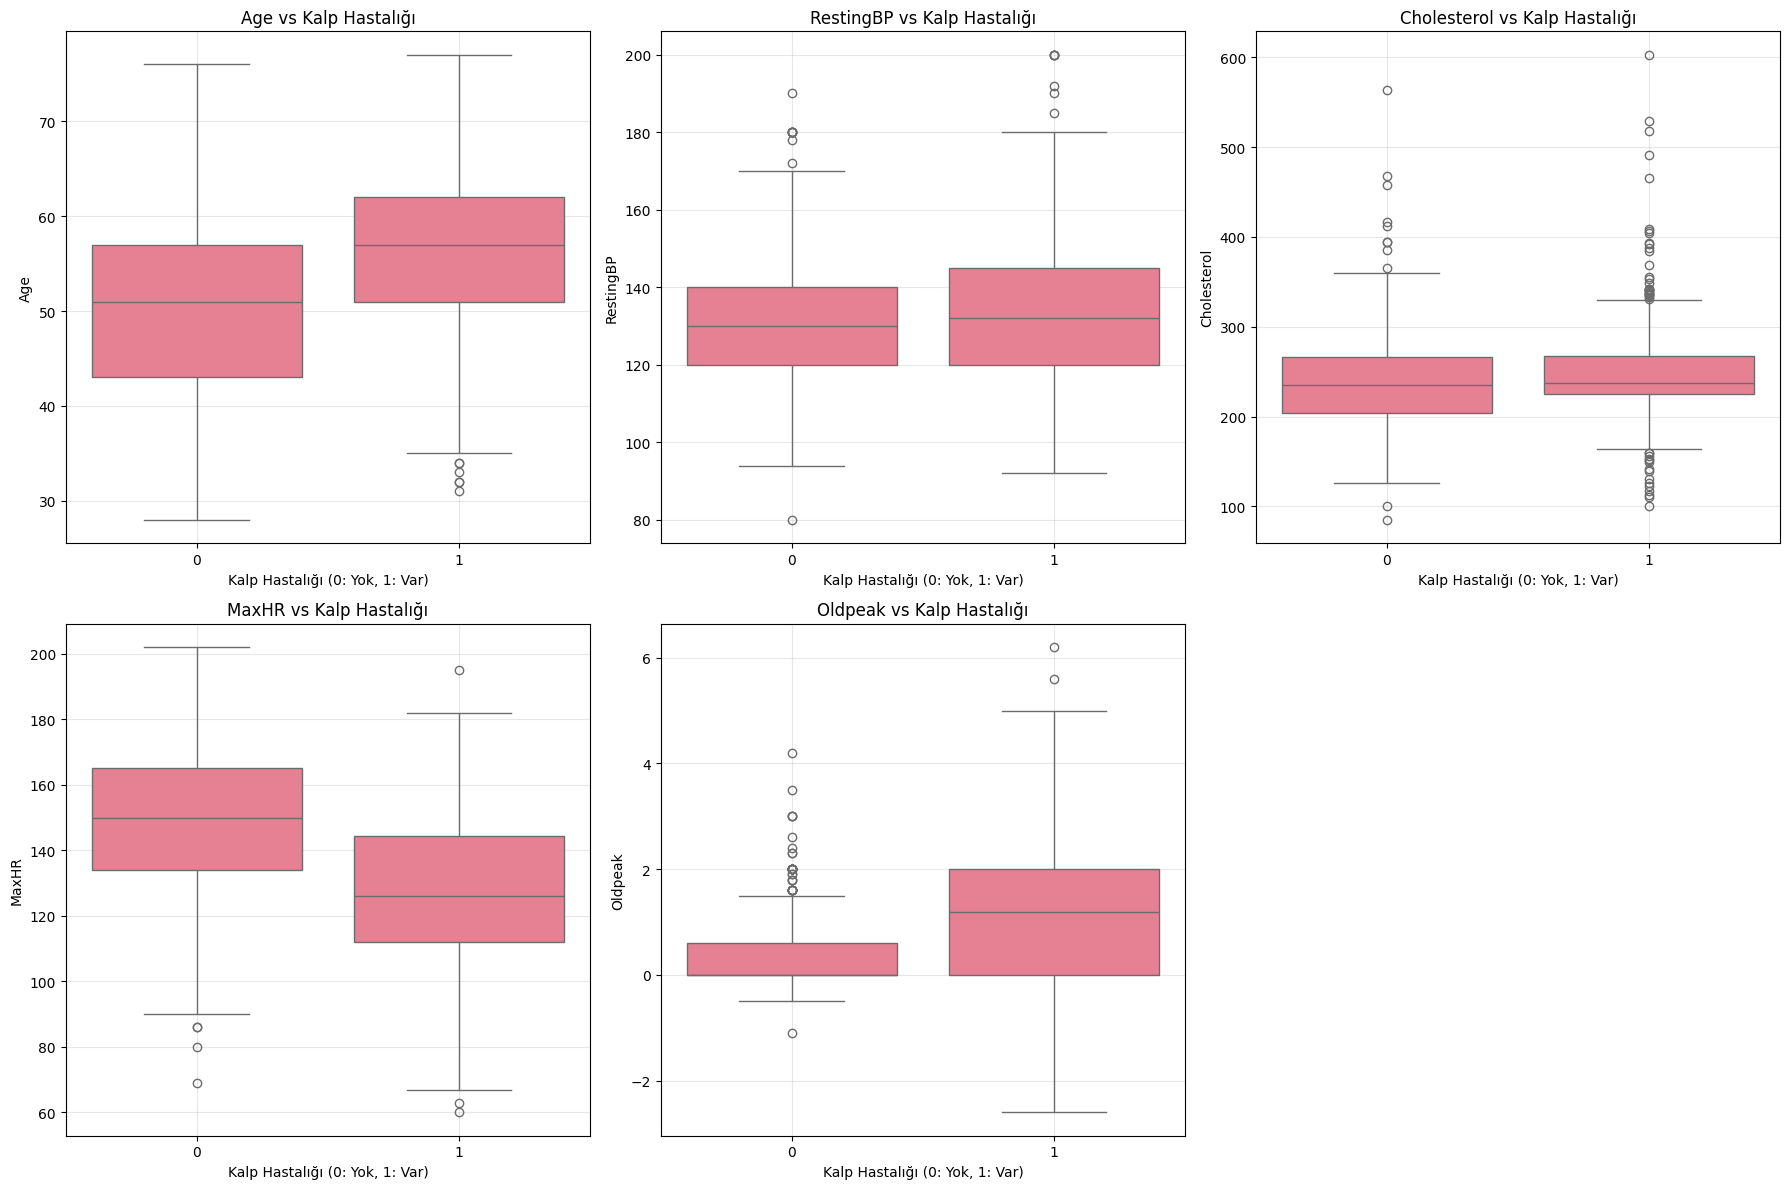

Ke≈üifsel veri analizi tamamlandƒ±!


In [124]:
# √ñnemli deƒüi≈ükenlerin kalp hastalƒ±ƒüƒ± ile ili≈ükisi
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Analiz edilecek sayƒ±sal deƒüi≈ükenler
key_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
existing_vars = [var for var in key_variables if var in df_encoded.columns]

for i, var in enumerate(existing_vars[:6]):
    if i < len(axes):
        # Box plot
        sns.boxplot(data=df_encoded, x='HeartDisease', y=var, ax=axes[i])
        axes[i].set_title(f'{var} vs Kalp Hastalƒ±ƒüƒ±')
        axes[i].set_xlabel('Kalp Hastalƒ±ƒüƒ± (0: Yok, 1: Var)')
        axes[i].grid(True, alpha=0.3)

# Bo≈ü subplot'larƒ± gizle
for i in range(len(existing_vars), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Kategorik deƒüi≈ükenlerin analizi
if len(categorical_columns) > 0:
    # Orijinal kategorik deƒüi≈ükenler i√ßin analiz
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    # Cinsiyet analizi (eƒüer varsa)
    original_categorical = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
    existing_cat_vars = [var for var in original_categorical if var in df_cleaned.columns]
    
    for i, var in enumerate(existing_cat_vars[:4]):
        if i < len(axes):
            # √áapraz tablo olu≈ütur
            crosstab = pd.crosstab(df_cleaned[var], df_cleaned['HeartDisease'], normalize='index')
            crosstab.plot(kind='bar', ax=axes[i], rot=45)
            axes[i].set_title(f'{var} vs Kalp Hastalƒ±ƒüƒ±')
            axes[i].set_ylabel('Oran')
            axes[i].legend(['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±'])
    
    # Bo≈ü subplot'larƒ± gizle
    for i in range(len(existing_cat_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("Ke≈üifsel veri analizi tamamlandƒ±!")

## 7. Veri Setinin Eƒüitim ve Test Olarak B√∂l√ºnmesi

Makine √∂ƒürenmesi modelleri i√ßin veri setini eƒüitim ve test setlerine ayƒ±racaƒüƒ±z.

In [125]:
# NaN deƒüerlerin kontrol√º ve temizlenmesi
print("=== NaN DEƒûER KONTROL√ú ===")
print("df_encoded'da eksik deƒüerler:")
print(df_encoded.isnull().sum())

# NaN deƒüerleri temizle
df_final = df_encoded.copy()

# Kategorik s√ºtunlardaki NaN deƒüerleri mode (en sƒ±k deƒüer) ile doldur
categorical_cols = df_final.select_dtypes(include=['category']).columns
for col in categorical_cols:
    if df_final[col].isnull().sum() > 0:
        mode_value = df_final[col].mode()[0] if len(df_final[col].mode()) > 0 else 0
        df_final[col].fillna(mode_value, inplace=True)
        print(f"{col} s√ºtunundaki NaN deƒüerler {mode_value} ile dolduruldu")

# Sayƒ±sal s√ºtunlardaki NaN deƒüerleri medyan ile doldur
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_final[col].isnull().sum() > 0:
        median_value = df_final[col].median()
        df_final[col].fillna(median_value, inplace=True)
        print(f"{col} s√ºtunundaki NaN deƒüerler {median_value:.2f} ile dolduruldu")

print("\nTemizleme sonrasƒ± eksik deƒüerler:")
print(df_final.isnull().sum())
print(f"\nFinal veri seti boyutu: {df_final.shape}")

# Baƒüƒ±msƒ±z deƒüi≈ükenler (features) ve baƒüƒ±mlƒ± deƒüi≈üken (target) ayƒ±rma
X = df_final.drop('HeartDisease', axis=1)
y = df_final['HeartDisease']

print("=== VERƒ∞ SETƒ∞ B√ñLME ===")
print(f"Toplam √∂zellik sayƒ±sƒ±: {X.shape[1]}")
print(f"√ñzellikler: {list(X.columns)}")
print(f"Hedef deƒüi≈üken: HeartDisease")
print(f"Toplam g√∂zlem sayƒ±sƒ±: {len(X)}")

# Eƒüitim ve test setlerine ayƒ±rma (%80 eƒüitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Hedef deƒüi≈ükenin daƒüƒ±lƒ±mƒ±nƒ± korur
)

print(f"\nEƒüitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

# Eƒüitim ve test setlerindeki sƒ±nƒ±f daƒüƒ±lƒ±mlarƒ±
print(f"\nEƒüitim setinde hedef deƒüi≈üken daƒüƒ±lƒ±mƒ±:")
print(y_train.value_counts(normalize=True))
print(f"\nTest setinde hedef deƒüi≈üken daƒüƒ±lƒ±mƒ±:")
print(y_test.value_counts(normalize=True))

# √ñzellikleri √∂l√ßeklendirme (√∂zellikle KNN i√ßin √∂nemli)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n√ñl√ßeklendirme tamamlandƒ±!")
print(f"Orijinal √∂zellik aralƒ±klarƒ± (√∂rnek):")
if 'Age' in X.columns:
    print(f"  Ya≈ü: {X['Age'].min():.1f} - {X['Age'].max():.1f}")
if 'RestingBP' in X.columns:
    print(f"  Kan basƒ±ncƒ±: {X['RestingBP'].min():.1f} - {X['RestingBP'].max():.1f}")

print(f"√ñl√ßeklendirilmi≈ü √∂zellik aralƒ±klarƒ± (√∂rnek):")
print(f"  Ortalama: {X_train_scaled.mean(axis=0)[:3]}")
print(f"  Standart sapma: {X_train_scaled.std(axis=0)[:3]}")

=== NaN DEƒûER KONTROL√ú ===
df_encoded'da eksik deƒüerler:
Age                    0
Sex                    0
ChestPainType          0
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG             0
MaxHR                  0
ExerciseAngina         0
Oldpeak                0
ST_Slope               0
HeartDisease           0
AgeGroup               0
BPCategory             0
CholesterolCategory    1
HRCategory             0
RiskScore              0
dtype: int64
CholesterolCategory s√ºtunundaki NaN deƒüerler 1 ile dolduruldu

Temizleme sonrasƒ± eksik deƒüerler:
Age                    0
Sex                    0
ChestPainType          0
RestingBP              0
Cholesterol            0
FastingBS              0
RestingECG             0
MaxHR                  0
ExerciseAngina         0
Oldpeak                0
ST_Slope               0
HeartDisease           0
AgeGroup               0
BPCategory             0
CholesterolCategory    0
HRCategory             0
R

## 8. Makine √ñƒürenmesi Modellerinin Eƒüitilmesi

Bu b√∂l√ºmde Random Forest, Decision Tree, k-Nearest Neighbor ve Gaussian Naive Bayes algoritmalarƒ±nƒ± eƒüiteceƒüiz.

In [126]:
# Modelleri tanƒ±mlama
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gaussian Naive Bayes': GaussianNB()
}

# Model eƒüitimi ve tahminleri
trained_models = {}
predictions = {}
probabilities = {}

print("=== MODEL Eƒûƒ∞Tƒ∞Mƒ∞ ===")

for name, model in models.items():
    print(f"\n{name} eƒüitiliyor...")
    
    # KNN i√ßin √∂l√ßeklendirilmi≈ü veri, diƒüerleri i√ßin orijinal veri
    if name == 'K-Nearest Neighbors':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_prob = y_pred
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = y_pred
    
    # Sonu√ßlarƒ± kaydet
    trained_models[name] = model
    predictions[name] = y_pred
    probabilities[name] = y_prob
    
    print(f"{name} eƒüitimi tamamlandƒ±!")

print("\nT√ºm modeller ba≈üarƒ±yla eƒüitildi!")

# Cross-validation skorlarƒ±
print("\n=== CROSS-VALƒ∞DATƒ∞ON SKORLARI ===")
cv_scores = {}

for name, model in models.items():
    if name == 'K-Nearest Neighbors':
        cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_scores[name] = cv_score
    print(f"{name}:")
    print(f"  Ortalama CV Skoru: {cv_score.mean():.4f} (+/- {cv_score.std() * 2:.4f})")
    print(f"  En iyi skor: {cv_score.max():.4f}")
    print(f"  En k√∂t√º skor: {cv_score.min():.4f}")

=== MODEL Eƒûƒ∞Tƒ∞Mƒ∞ ===

Random Forest eƒüitiliyor...
Random Forest eƒüitimi tamamlandƒ±!

Decision Tree eƒüitiliyor...
Decision Tree eƒüitimi tamamlandƒ±!

K-Nearest Neighbors eƒüitiliyor...
K-Nearest Neighbors eƒüitimi tamamlandƒ±!

Gaussian Naive Bayes eƒüitiliyor...
Gaussian Naive Bayes eƒüitimi tamamlandƒ±!

T√ºm modeller ba≈üarƒ±yla eƒüitildi!

=== CROSS-VALƒ∞DATƒ∞ON SKORLARI ===
K-Nearest Neighbors eƒüitimi tamamlandƒ±!

Gaussian Naive Bayes eƒüitiliyor...
Gaussian Naive Bayes eƒüitimi tamamlandƒ±!

T√ºm modeller ba≈üarƒ±yla eƒüitildi!

=== CROSS-VALƒ∞DATƒ∞ON SKORLARI ===
Random Forest:
  Ortalama CV Skoru: 0.8474 (+/- 0.0349)
  En iyi skor: 0.8639
  En k√∂t√º skor: 0.8151
Decision Tree:
  Ortalama CV Skoru: 0.7983 (+/- 0.0819)
  En iyi skor: 0.8639
  En k√∂t√º skor: 0.7466
K-Nearest Neighbors:
  Ortalama CV Skoru: 0.8215 (+/- 0.0695)
  En iyi skor: 0.8707
  En k√∂t√º skor: 0.7671
Gaussian Naive Bayes:
  Ortalama CV Skoru: 0.8228 (+/- 0.0644)
  En iyi skor: 0.8707
  En k√∂t√º 

In [127]:
# Model eƒüitimi √∂ncesi final kontroller
print("=== MODEL Eƒûƒ∞Tƒ∞Mƒ∞ √ñNCESƒ∞ KONTROLLER ===")
print(f"X_train'de NaN deƒüer var mƒ±? {X_train.isnull().any().any()}")
print(f"X_test'te NaN deƒüer var mƒ±? {X_test.isnull().any().any()}")
print(f"y_train'de NaN deƒüer var mƒ±? {y_train.isnull().any()}")
print(f"y_test'te NaN deƒüer var mƒ±? {y_test.isnull().any()}")

print(f"X_train_scaled'de NaN deƒüer var mƒ±? {np.isnan(X_train_scaled).any()}")
print(f"X_test_scaled'de NaN deƒüer var mƒ±? {np.isnan(X_test_scaled).any()}")

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Eƒüer hala NaN deƒüerler varsa, onlarƒ± da temizle
if X_train.isnull().any().any():
    print("X_train'deki NaN deƒüerler temizleniyor...")
    X_train = X_train.fillna(X_train.median())
    
if X_test.isnull().any().any():
    print("X_test'teki NaN deƒüerler temizleniyor...")
    X_test = X_test.fillna(X_test.median())

# √ñl√ßeklendirmeyi tekrar yap
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Kontroller tamamlandƒ±, model eƒüitimine ba≈ülanabilir!")

=== MODEL Eƒûƒ∞Tƒ∞Mƒ∞ √ñNCESƒ∞ KONTROLLER ===
X_train'de NaN deƒüer var mƒ±? False
X_test'te NaN deƒüer var mƒ±? False
y_train'de NaN deƒüer var mƒ±? False
y_test'te NaN deƒüer var mƒ±? False
X_train_scaled'de NaN deƒüer var mƒ±? False
X_test_scaled'de NaN deƒüer var mƒ±? False
X_train shape: (734, 16)
X_test shape: (184, 16)
y_train shape: (734,)
y_test shape: (184,)
Kontroller tamamlandƒ±, model eƒüitimine ba≈ülanabilir!


## 9. Modellerin Performansƒ±nƒ±n Kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±

Bu b√∂l√ºmde t√ºm modellerin doƒüruluk, F1 skoru, ROC-AUC gibi performans metriklerini hesaplayƒ±p kar≈üƒ±la≈ütƒ±racaƒüƒ±z.

In [128]:
# Performans metriklerini hesaplama
performance_metrics = []

print("=== MODEL PERFORMANS METRƒ∞KLERƒ∞ ===")

for name in models.keys():
    y_pred = predictions[name]
    y_prob = probabilities[name]
    
    # Temel metrikler
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # ROC-AUC skoru
    try:
        roc_auc = roc_auc_score(y_test, y_prob)
    except:
        roc_auc = roc_auc_score(y_test, y_pred)
    
    # Cross-validation skoru
    cv_score = cv_scores[name].mean()
    
    # Sonu√ßlarƒ± kaydet
    performance_metrics.append({
        'Model': name,
        'Doƒüruluk': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV-Score': cv_score
    })
    
    print(f"\n{name}:")
    print(f"  Doƒüruluk: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  CV-Score: {cv_score:.4f}")

# Performans tablosu olu≈üturma
performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.round(4)

print("\n=== PERFORMANS KAR≈ûILA≈ûTIRMA TABLOSU ===")
print(performance_df)

=== MODEL PERFORMANS METRƒ∞KLERƒ∞ ===

Random Forest:
  Doƒüruluk: 0.8533
  Precision: 0.8535
  Recall: 0.8533
  F1-Score: 0.8533
  ROC-AUC: 0.9254
  CV-Score: 0.8474

Decision Tree:
  Doƒüruluk: 0.7609
  Precision: 0.7651
  Recall: 0.7609
  F1-Score: 0.7616
  ROC-AUC: 0.7566
  CV-Score: 0.7983

K-Nearest Neighbors:
  Doƒüruluk: 0.8370
  Precision: 0.8384
  Recall: 0.8370
  F1-Score: 0.8373
  ROC-AUC: 0.9087
  CV-Score: 0.8215

Gaussian Naive Bayes:
  Doƒüruluk: 0.8696
  Precision: 0.8736
  Recall: 0.8696
  F1-Score: 0.8699
  ROC-AUC: 0.9204
  CV-Score: 0.8228

=== PERFORMANS KAR≈ûILA≈ûTIRMA TABLOSU ===
                  Model  Doƒüruluk  Precision  Recall  F1-Score  ROC-AUC  \
0         Random Forest    0.8533     0.8535  0.8533    0.8533   0.9254   
1         Decision Tree    0.7609     0.7651  0.7609    0.7616   0.7566   
2   K-Nearest Neighbors    0.8370     0.8384  0.8370    0.8373   0.9087   
3  Gaussian Naive Bayes    0.8696     0.8736  0.8696    0.8699   0.9204   

   CV-Score 

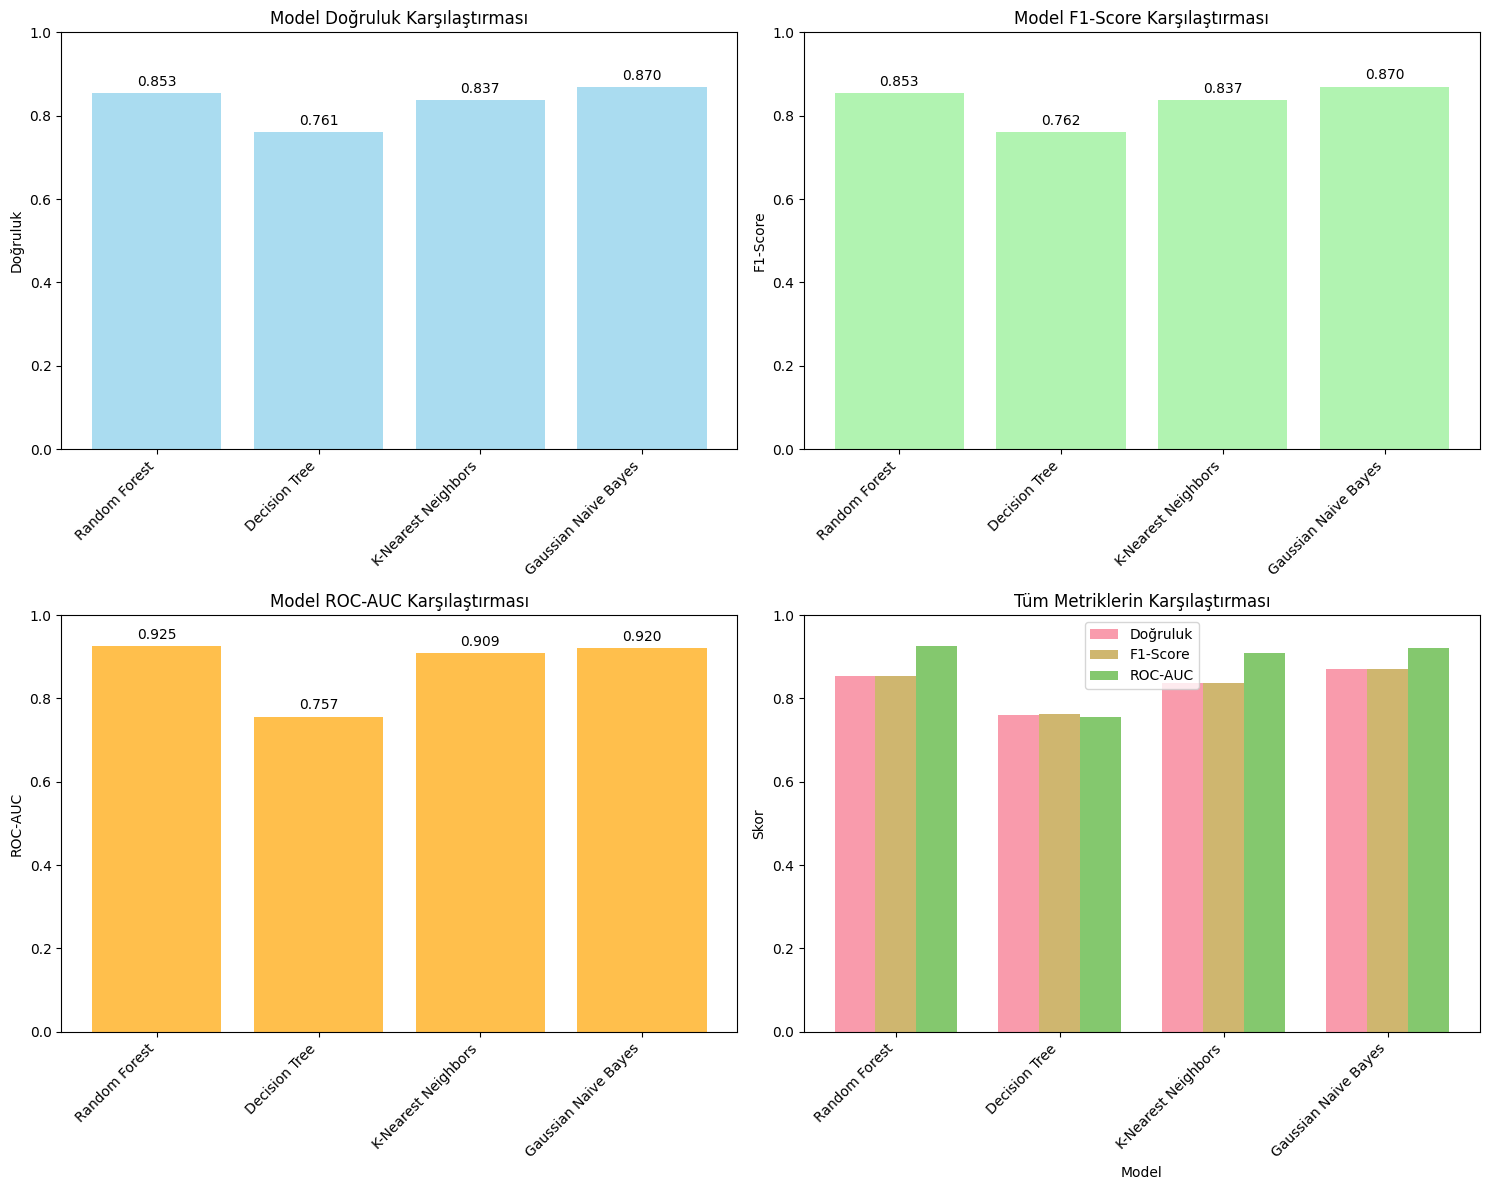


=== EN ƒ∞Yƒ∞ MODEL ===
Model: Random Forest
ROC-AUC Skoru: 0.9254
Doƒüruluk: 0.8533
F1-Score: 0.8533


In [129]:
# Performans metriklerinin g√∂rselle≈ütirilmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Doƒüruluk kar≈üƒ±la≈ütƒ±rmasƒ±
ax1 = axes[0, 0]
bars1 = ax1.bar(performance_df['Model'], performance_df['Doƒüruluk'], color='skyblue', alpha=0.7)
ax1.set_title('Model Doƒüruluk Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax1.set_ylabel('Doƒüruluk')
ax1.set_ylim(0, 1)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars1, performance_df['Doƒüruluk']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# 2. F1-Score kar≈üƒ±la≈ütƒ±rmasƒ±
ax2 = axes[0, 1]
bars2 = ax2.bar(performance_df['Model'], performance_df['F1-Score'], color='lightgreen', alpha=0.7)
ax2.set_title('Model F1-Score Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax2.set_ylabel('F1-Score')
ax2.set_ylim(0, 1)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars2, performance_df['F1-Score']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# 3. ROC-AUC kar≈üƒ±la≈ütƒ±rmasƒ±
ax3 = axes[1, 0]
bars3 = ax3.bar(performance_df['Model'], performance_df['ROC-AUC'], color='orange', alpha=0.7)
ax3.set_title('Model ROC-AUC Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax3.set_ylabel('ROC-AUC')
ax3.set_ylim(0, 1)
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
for bar, value in zip(bars3, performance_df['ROC-AUC']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# 4. T√ºm metriklerin kar≈üƒ±la≈ütƒ±rmasƒ±
ax4 = axes[1, 1]
metrics_to_plot = ['Doƒüruluk', 'F1-Score', 'ROC-AUC']
x = np.arange(len(performance_df['Model']))
width = 0.25

for i, metric in enumerate(metrics_to_plot):
    ax4.bar(x + i*width, performance_df[metric], width, 
            label=metric, alpha=0.7)

ax4.set_title('T√ºm Metriklerin Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax4.set_ylabel('Skor')
ax4.set_xlabel('Model')
ax4.set_xticks(x + width)
ax4.set_xticklabels(performance_df['Model'], rotation=45, ha='right')
ax4.legend()
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# En iyi model
best_model_idx = performance_df['ROC-AUC'].idxmax()
best_model_name = performance_df.loc[best_model_idx, 'Model']
best_auc_score = performance_df.loc[best_model_idx, 'ROC-AUC']

print(f"\n=== EN ƒ∞Yƒ∞ MODEL ===")
print(f"Model: {best_model_name}")
print(f"ROC-AUC Skoru: {best_auc_score:.4f}")
print(f"Doƒüruluk: {performance_df.loc[best_model_idx, 'Doƒüruluk']:.4f}")
print(f"F1-Score: {performance_df.loc[best_model_idx, 'F1-Score']:.4f}")

In [130]:
# Confusion Matrix g√∂rselle≈ütirmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(predictions.items()):
    if i < 4:
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                   xticklabels=['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±'],
                   yticklabels=['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±'])
        axes[i].set_title(f'{name} - Confusion Matrix')
        axes[i].set_ylabel('Ger√ßek Deƒüer')
        axes[i].set_xlabel('Tahmin Edilen Deƒüer')

plt.tight_layout()
plt.show()

# Detaylƒ± classification report
print("=== DETAYLI SINIFLANDIRMA RAPORU ===")
for name, y_pred in predictions.items():
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred, 
                              target_names=['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±']))

=== DETAYLI SINIFLANDIRMA RAPORU ===

Random Forest:
                precision    recall  f1-score   support

      Saƒülƒ±klƒ±       0.83      0.84      0.84        82
Kalp Hastalƒ±ƒüƒ±       0.87      0.86      0.87       102

      accuracy                           0.85       184
     macro avg       0.85      0.85      0.85       184
  weighted avg       0.85      0.85      0.85       184


Decision Tree:
                precision    recall  f1-score   support

      Saƒülƒ±klƒ±       0.71      0.78      0.74        82
Kalp Hastalƒ±ƒüƒ±       0.81      0.75      0.78       102

      accuracy                           0.76       184
     macro avg       0.76      0.76      0.76       184
  weighted avg       0.77      0.76      0.76       184


K-Nearest Neighbors:
                precision    recall  f1-score   support

      Saƒülƒ±klƒ±       0.80      0.84      0.82        82
Kalp Hastalƒ±ƒüƒ±       0.87      0.83      0.85       102

      accuracy                           0.

## 10. ROC-AUC Eƒürilerinin √áizilmesi

Bu b√∂l√ºmde t√ºm modeller i√ßin ROC eƒürilerini √ßizerek g√∂rsel kar≈üƒ±la≈ütƒ±rma yapacaƒüƒ±z.

In [131]:
# ROC eƒürilerini √ßizme
plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple']
linestyles = ['-', '--', '-.', ':', '-']

for i, (name, y_prob) in enumerate(probabilities.items()):
    # ROC eƒürisi hesaplama
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # ROC eƒürisini √ßizme
    plt.plot(fpr, tpr, 
             color=colors[i % len(colors)], 
             linestyle=linestyles[i % len(linestyles)],
             linewidth=2,
             label=f'{name} (AUC = {roc_auc:.3f})')

# Diagonal √ßizgi (rastgele sƒ±nƒ±flandƒ±rƒ±cƒ±)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Rastgele Sƒ±nƒ±flandƒ±rƒ±cƒ± (AUC = 0.500)')

# Grafik ayarlarƒ±
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlƒ±≈ü Pozitif Oranƒ± (1 - √ñzg√ºll√ºk)', fontsize=12)
plt.ylabel('Doƒüru Pozitif Oranƒ± (Duyarlƒ±lƒ±k)', fontsize=12)
plt.title('ROC Eƒürileri - Model Kar≈üƒ±la≈ütƒ±rmasƒ±', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# AUC skorlarƒ±nƒ±n sƒ±ralanmasƒ±
auc_scores = []
for name, y_prob in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores.append((name, roc_auc))

auc_scores.sort(key=lambda x: x[1], reverse=True)

print("=== ROC-AUC SKORLARI (Y√úKSEKTEN D√ú≈û√úƒûE) ===")
for i, (name, score) in enumerate(auc_scores, 1):
    print(f"{i}. {name}: {score:.4f}")

print(f"\nEn iyi performans g√∂steren model: {auc_scores[0][0]} (AUC: {auc_scores[0][1]:.4f})")

=== ROC-AUC SKORLARI (Y√úKSEKTEN D√ú≈û√úƒûE) ===
1. Random Forest: 0.9254
2. Gaussian Naive Bayes: 0.9204
3. K-Nearest Neighbors: 0.9087
4. Decision Tree: 0.7566

En iyi performans g√∂steren model: Random Forest (AUC: 0.9254)


## 11. Geli≈ümi≈ü Makine √ñƒürenmesi Teknikleri (State-of-the-Art)

Bu b√∂l√ºmde, en son teknolojileri kullanarak daha iyi sonu√ßlar elde etmeye √ßalƒ±≈üacaƒüƒ±z:

### Kullanƒ±lacak Teknikler:
1. **XGBoost**: Gradient boosting'in optimize edilmi≈ü versiyonu
2. **LightGBM**: Microsoft'un hƒ±zlƒ± gradient boosting algoritmasƒ±
3. **CatBoost**: Kategorik veriler i√ßin optimize edilmi≈ü boosting
4. **Stacking Ensemble**: Birden fazla modeli kombine etme
5. **Bayesian Optimization**: Hyperparameter tuning i√ßin
6. **Advanced Feature Engineering**: Polinom √∂zellikler ve etkile≈üimler
7. **Neural Networks**: Deep learning yakla≈üƒ±mƒ±

In [132]:
# Geli≈ümi≈ü k√ºt√ºphaneleri y√ºkleme
import subprocess
import sys

def install_packages(packages):
    """Install packages if not already installed"""
    for package in packages:
        try:
            __import__(package.split('==')[0])
            print(f"‚úì {package} zaten y√ºkl√º")
        except ImportError:
            print(f"‚ö† {package} y√ºkleniyor...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"‚úì {package} ba≈üarƒ±yla y√ºklendi")

# Gerekli paketleri y√ºkle
advanced_packages = [
    'xgboost',
    'lightgbm', 
    'catboost',
    'scikit-optimize',
    'tensorflow',
    'keras',
    'optuna'
]

install_packages(advanced_packages)

# Geli≈ümi≈ü k√ºt√ºphaneleri i√ße aktarma
try:
    import xgboost as xgb
    import lightgbm as lgb
    import catboost as cb
    from sklearn.neural_network import MLPClassifier
    from sklearn.ensemble import VotingClassifier, StackingClassifier
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.feature_selection import SelectKBest, f_classif
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    from sklearn.metrics import make_scorer
    
    # Bayesian optimization i√ßin
    from skopt import BayesSearchCV
    from skopt.space import Real, Integer, Categorical
    
    print("‚úì T√ºm geli≈ümi≈ü k√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!")
    
except ImportError as e:
    print(f"‚ö† Bazƒ± k√ºt√ºphaneler y√ºklenemedi: {e}")
    print("Temel k√ºt√ºphanelerle devam ediliyor...")
    
# TensorFlow/Keras import (isteƒüe baƒülƒ±)
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    print("‚úì TensorFlow/Keras ba≈üarƒ±yla y√ºklendi!")
    tf.random.set_seed(42)
except ImportError:
    print("‚ö† TensorFlow y√ºklenemedi, Neural Network kƒ±smƒ± atlanacak")

‚úì xgboost zaten y√ºkl√º
‚úì lightgbm zaten y√ºkl√º
‚úì catboost zaten y√ºkl√º
‚ö† scikit-optimize y√ºkleniyor...
‚úì scikit-optimize ba≈üarƒ±yla y√ºklendi
‚úì tensorflow zaten y√ºkl√º
‚úì keras zaten y√ºkl√º
‚úì optuna zaten y√ºkl√º
‚úì T√ºm geli≈ümi≈ü k√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!
‚úì TensorFlow/Keras ba≈üarƒ±yla y√ºklendi!
‚úì scikit-optimize ba≈üarƒ±yla y√ºklendi
‚úì tensorflow zaten y√ºkl√º
‚úì keras zaten y√ºkl√º
‚úì optuna zaten y√ºkl√º
‚úì T√ºm geli≈ümi≈ü k√ºt√ºphaneler ba≈üarƒ±yla y√ºklendi!
‚úì TensorFlow/Keras ba≈üarƒ±yla y√ºklendi!


In [133]:
# Geli≈ümi≈ü √∂zellik m√ºhendisliƒüi
print("=== GELƒ∞≈ûMƒ∞≈û √ñZELLƒ∞K M√úHENDƒ∞SLƒ∞ƒûƒ∞ ===")

# Orijinal √∂zellikler
X_original = X.copy()
y_original = y.copy()

# 1. Polinom √∂zellikler (degree=2)
print("1. Polinom √∂zellikler olu≈üturuluyor...")
poly_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly_features.fit_transform(X_original)
print(f"   Polinom √∂zellikler: {X_original.shape[1]} -> {X_poly.shape[1]}")

# 2. En iyi k √∂zellikleri se√ßme
print("2. En iyi √∂zellikler se√ßiliyor...")
k_best = SelectKBest(score_func=f_classif, k=min(50, X_poly.shape[1]))
X_selected = k_best.fit_transform(X_poly, y_original)
print(f"   Se√ßilen √∂zellik sayƒ±sƒ±: {X_selected.shape[1]}")

# 3. √ñzellik isimleri
feature_names = poly_features.get_feature_names_out(X_original.columns)
selected_features = k_best.get_support()
selected_feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_features[i]]
print(f"   Se√ßilen √∂zellik √∂rnekleri: {selected_feature_names[:10]}")

# 4. Yeni eƒüitim/test setleri
X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(
    X_selected, y_original, test_size=0.2, random_state=42, stratify=y_original
)

# 5. √ñl√ßeklendirme
scaler_advanced = StandardScaler()
X_train_scaled_advanced = scaler_advanced.fit_transform(X_train_advanced)
X_test_scaled_advanced = scaler_advanced.transform(X_test_advanced)

print(f"Geli≈ümi≈ü √∂zellik seti boyutu: {X_train_advanced.shape}")
print(f"Eƒüitim seti: {X_train_scaled_advanced.shape}")
print(f"Test seti: {X_test_scaled_advanced.shape}")

# 6. √ñzellik √∂nem skorlarƒ±
feature_scores = k_best.scores_[selected_features]
feature_importance_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Score': feature_scores
}).sort_values('Score', ascending=False)

print("\n=== EN √ñNEMLƒ∞ 10 √ñZELLƒ∞K ===")
print(feature_importance_df.head(10))

=== GELƒ∞≈ûMƒ∞≈û √ñZELLƒ∞K M√úHENDƒ∞SLƒ∞ƒûƒ∞ ===
1. Polinom √∂zellikler olu≈üturuluyor...
   Polinom √∂zellikler: 16 -> 136
2. En iyi √∂zellikler se√ßiliyor...
   Se√ßilen √∂zellik sayƒ±sƒ±: 50
   Se√ßilen √∂zellik √∂rnekleri: ['ChestPainType', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HRCategory', 'Age Sex', 'Age ChestPainType', 'Age ExerciseAngina', 'Age Oldpeak']
Geli≈ümi≈ü √∂zellik seti boyutu: (734, 50)
Eƒüitim seti: (734, 50)
Test seti: (184, 50)

=== EN √ñNEMLƒ∞ 10 √ñZELLƒ∞K ===
                     Feature       Score
36            MaxHR ST_Slope  494.060501
4                   ST_Slope  415.830346
26        RestingBP ST_Slope  330.114568
48       ST_Slope HRCategory  306.407471
21    ChestPainType ST_Slope  304.764142
2             ExerciseAngina  296.144771
24  RestingBP ExerciseAngina  296.132468
8         Age ExerciseAngina  295.278860
43  ExerciseAngina RiskScore  292.489425
14        Sex ExerciseAngina  291.779616


In [134]:
# Geli≈ümi≈ü Gradient Boosting Modelleri
print("=== GELƒ∞≈ûMƒ∞≈û GRADIENT BOOSTING MODELLERƒ∞ ===")

# Geli≈ümi≈ü modelleri tanƒ±mlama
advanced_models = {}

# 1. XGBoost
try:
    xgb_model = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )
    advanced_models['XGBoost'] = xgb_model
    print("‚úì XGBoost modeli eklendi")
except:
    print("‚ö† XGBoost y√ºklenemedi")

# 2. LightGBM
try:
    lgb_model = lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    )
    advanced_models['LightGBM'] = lgb_model
    print("‚úì LightGBM modeli eklendi")
except:
    print("‚ö† LightGBM y√ºklenemedi")

# 3. CatBoost
try:
    cat_model = cb.CatBoostClassifier(
        iterations=200,
        depth=6,
        learning_rate=0.1,
        random_seed=42,
        verbose=False
    )
    advanced_models['CatBoost'] = cat_model
    print("‚úì CatBoost modeli eklendi")
except:
    print("‚ö† CatBoost y√ºklenemedi")

# 4. Geli≈ümi≈ü Random Forest
from sklearn.ensemble import ExtraTreesClassifier
advanced_rf = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
advanced_models['Advanced Random Forest'] = advanced_rf
print("‚úì Geli≈ümi≈ü Random Forest modeli eklendi")

# 5. Neural Network (MLP)
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=32,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
advanced_models['Neural Network (MLP)'] = mlp_model
print("‚úì Neural Network modeli eklendi")

print(f"\nToplam {len(advanced_models)} geli≈ümi≈ü model hazƒ±r!")

# Modelleri eƒüitme
advanced_trained_models = {}
advanced_predictions = {}
advanced_probabilities = {}

print("\n=== GELƒ∞≈ûMƒ∞≈û MODEL Eƒûƒ∞Tƒ∞Mƒ∞ ===")

for name, model in advanced_models.items():
    print(f"\n{name} eƒüitiliyor...")
    
    try:
        # √ñl√ßeklendirilmi≈ü veri kullan
        model.fit(X_train_scaled_advanced, y_train_advanced)
        y_pred = model.predict(X_test_scaled_advanced)
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled_advanced)[:, 1]
        else:
            y_prob = y_pred
        
        # Sonu√ßlarƒ± kaydet
        advanced_trained_models[name] = model
        advanced_predictions[name] = y_pred
        advanced_probabilities[name] = y_prob
        
        print(f"‚úì {name} ba≈üarƒ±yla eƒüitildi!")
        
    except Exception as e:
        print(f"‚ö† {name} eƒüitimi ba≈üarƒ±sƒ±z: {e}")

print(f"\n‚úì {len(advanced_trained_models)} geli≈ümi≈ü model ba≈üarƒ±yla eƒüitildi!")

=== GELƒ∞≈ûMƒ∞≈û GRADIENT BOOSTING MODELLERƒ∞ ===
‚úì XGBoost modeli eklendi
‚úì LightGBM modeli eklendi
‚úì CatBoost modeli eklendi
‚úì Geli≈ümi≈ü Random Forest modeli eklendi
‚úì Neural Network modeli eklendi

Toplam 5 geli≈ümi≈ü model hazƒ±r!

=== GELƒ∞≈ûMƒ∞≈û MODEL Eƒûƒ∞Tƒ∞Mƒ∞ ===

XGBoost eƒüitiliyor...
‚úì XGBoost ba≈üarƒ±yla eƒüitildi!

LightGBM eƒüitiliyor...
‚úì LightGBM ba≈üarƒ±yla eƒüitildi!

CatBoost eƒüitiliyor...
‚úì LightGBM ba≈üarƒ±yla eƒüitildi!

CatBoost eƒüitiliyor...
‚úì CatBoost ba≈üarƒ±yla eƒüitildi!

Advanced Random Forest eƒüitiliyor...
‚úì CatBoost ba≈üarƒ±yla eƒüitildi!

Advanced Random Forest eƒüitiliyor...
‚úì Advanced Random Forest ba≈üarƒ±yla eƒüitildi!

Neural Network (MLP) eƒüitiliyor...
‚úì Advanced Random Forest ba≈üarƒ±yla eƒüitildi!

Neural Network (MLP) eƒüitiliyor...
‚úì Neural Network (MLP) ba≈üarƒ±yla eƒüitildi!

‚úì 5 geli≈ümi≈ü model ba≈üarƒ±yla eƒüitildi!
‚úì Neural Network (MLP) ba≈üarƒ±yla eƒüitildi!

‚úì 5 geli≈ümi≈ü model ba≈üarƒ±yla eƒüit

In [135]:
# Bayesian Optimization ile Hyperparameter Tuning
print("=== BAYESIAN OPTIMIZATION ƒ∞LE Hƒ∞PERPARAMETRE OPTƒ∞Mƒ∞ZASYONU ===")

# En iyi modeli se√ßip optimize etme
best_model_name = None
best_score = 0

# √ñnce basit deƒüerlendirme
for name, y_pred in advanced_predictions.items():
    accuracy = accuracy_score(y_test_advanced, y_pred)
    if accuracy > best_score:
        best_score = accuracy
        best_model_name = name

print(f"En iyi ba≈ülangƒ±√ß modeli: {best_model_name} (Doƒüruluk: {best_score:.4f})")

# XGBoost i√ßin Bayesian Optimization (eƒüer mevcut ise)
if 'XGBoost' in advanced_trained_models:
    print("\nXGBoost i√ßin Bayesian Optimization ba≈ülatƒ±lƒ±yor...")
    
    try:
        # Arama uzayƒ± tanƒ±mlama
        xgb_search_space = {
            'n_estimators': Integer(100, 500),
            'max_depth': Integer(3, 10),
            'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
            'subsample': Real(0.6, 1.0),
            'colsample_bytree': Real(0.6, 1.0),
            'gamma': Real(0, 10),
            'reg_alpha': Real(0, 10),
            'reg_lambda': Real(1, 10)
        }
        
        # Bayesian Search
        xgb_bayes = BayesSearchCV(
            xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
            xgb_search_space,
            n_iter=30,  # Daha az iterasyon (zaman tasarrufu)
            cv=3,      # 3-fold CV
            scoring='roc_auc',
            n_jobs=-1,
            random_state=42
        )
        
        # Fit
        xgb_bayes.fit(X_train_scaled_advanced, y_train_advanced)
        
        # En iyi modeli al
        best_xgb = xgb_bayes.best_estimator_
        
        # Tahmin et
        y_pred_xgb_opt = best_xgb.predict(X_test_scaled_advanced)
        y_prob_xgb_opt = best_xgb.predict_proba(X_test_scaled_advanced)[:, 1]
        
        # Sonu√ßlarƒ± kaydet
        advanced_trained_models['XGBoost (Optimized)'] = best_xgb
        advanced_predictions['XGBoost (Optimized)'] = y_pred_xgb_opt
        advanced_probabilities['XGBoost (Optimized)'] = y_prob_xgb_opt
        
        print(f"‚úì XGBoost Bayesian Optimization tamamlandƒ±!")
        print(f"  En iyi parametreler: {xgb_bayes.best_params_}")
        print(f"  En iyi CV skoru: {xgb_bayes.best_score_:.4f}")
        
    except Exception as e:
        print(f"‚ö† XGBoost Bayesian Optimization ba≈üarƒ±sƒ±z: {e}")

# LightGBM i√ßin hƒ±zlƒ± grid search
if 'LightGBM' in advanced_trained_models:
    print("\nLightGBM i√ßin hƒ±zlƒ± grid search...")
    
    try:
        lgb_params = {
            'n_estimators': [100, 200, 300],
            'max_depth': [4, 6, 8],
            'learning_rate': [0.05, 0.1, 0.15],
            'subsample': [0.8, 0.9, 1.0]
        }
        
        lgb_grid = GridSearchCV(
            lgb.LGBMClassifier(random_state=42, verbose=-1),
            lgb_params,
            cv=3,
            scoring='roc_auc',
            n_jobs=-1
        )
        
        lgb_grid.fit(X_train_scaled_advanced, y_train_advanced)
        
        best_lgb = lgb_grid.best_estimator_
        y_pred_lgb_opt = best_lgb.predict(X_test_scaled_advanced)
        y_prob_lgb_opt = best_lgb.predict_proba(X_test_scaled_advanced)[:, 1]
        
        advanced_trained_models['LightGBM (Optimized)'] = best_lgb
        advanced_predictions['LightGBM (Optimized)'] = y_pred_lgb_opt
        advanced_probabilities['LightGBM (Optimized)'] = y_prob_lgb_opt
        
        print(f"‚úì LightGBM grid search tamamlandƒ±!")
        print(f"  En iyi parametreler: {lgb_grid.best_params_}")
        print(f"  En iyi CV skoru: {lgb_grid.best_score_:.4f}")
        
    except Exception as e:
        print(f"‚ö† LightGBM grid search ba≈üarƒ±sƒ±z: {e}")

print(f"\nOptimizasyon sonrasƒ± toplam model sayƒ±sƒ±: {len(advanced_trained_models)}")

=== BAYESIAN OPTIMIZATION ƒ∞LE Hƒ∞PERPARAMETRE OPTƒ∞Mƒ∞ZASYONU ===
En iyi ba≈ülangƒ±√ß modeli: Advanced Random Forest (Doƒüruluk: 0.8804)

XGBoost i√ßin Bayesian Optimization ba≈ülatƒ±lƒ±yor...
‚úì XGBoost Bayesian Optimization tamamlandƒ±!
  En iyi parametreler: OrderedDict({'colsample_bytree': 0.7998166085900246, 'gamma': 3.2792016896177696, 'learning_rate': 0.0206072280888962, 'max_depth': 8, 'n_estimators': 159, 'reg_alpha': 0.16421526305310133, 'reg_lambda': 1.0143956362364959, 'subsample': 0.67770511384254})
  En iyi CV skoru: 0.9285

LightGBM i√ßin hƒ±zlƒ± grid search...
‚úì XGBoost Bayesian Optimization tamamlandƒ±!
  En iyi parametreler: OrderedDict({'colsample_bytree': 0.7998166085900246, 'gamma': 3.2792016896177696, 'learning_rate': 0.0206072280888962, 'max_depth': 8, 'n_estimators': 159, 'reg_alpha': 0.16421526305310133, 'reg_lambda': 1.0143956362364959, 'subsample': 0.67770511384254})
  En iyi CV skoru: 0.9285

LightGBM i√ßin hƒ±zlƒ± grid search...
‚úì LightGBM grid search

In [136]:
# Ensemble Y√∂ntemleri - Voting ve Stacking
print("=== ENSEMBLE Y√ñNTEMLERƒ∞ ===")

# En iyi performans g√∂steren modelleri se√ßme
def get_best_models(models_dict, predictions_dict, top_n=3):
    """En iyi performans g√∂steren modelleri se√ß"""
    model_scores = []
    
    for name, y_pred in predictions_dict.items():
        if name in models_dict:
            accuracy = accuracy_score(y_test_advanced, y_pred)
            model_scores.append((name, accuracy, models_dict[name]))
    
    # En iyi modelleri se√ß
    model_scores.sort(key=lambda x: x[1], reverse=True)
    return model_scores[:top_n]

# En iyi modelleri al
best_models = get_best_models(advanced_trained_models, advanced_predictions, top_n=3)
print("En iyi 3 model:")
for i, (name, score, model) in enumerate(best_models, 1):
    print(f"{i}. {name}: {score:.4f}")

# 1. Voting Classifier (Soft Voting)
print("\n1. Voting Classifier olu≈üturuluyor...")
try:
    voting_estimators = [(name, model) for name, score, model in best_models]
    
    voting_clf = VotingClassifier(
        estimators=voting_estimators,
        voting='soft'  # Olasƒ±lƒ±k tabanlƒ± voting
    )
    
    voting_clf.fit(X_train_scaled_advanced, y_train_advanced)
    
    y_pred_voting = voting_clf.predict(X_test_scaled_advanced)
    y_prob_voting = voting_clf.predict_proba(X_test_scaled_advanced)[:, 1]
    
    advanced_trained_models['Voting Ensemble'] = voting_clf
    advanced_predictions['Voting Ensemble'] = y_pred_voting
    advanced_probabilities['Voting Ensemble'] = y_prob_voting
    
    print("‚úì Voting Classifier ba≈üarƒ±yla olu≈üturuldu!")
    
except Exception as e:
    print(f"‚ö† Voting Classifier olu≈üturulamadƒ±: {e}")

# 2. Stacking Classifier
print("\n2. Stacking Classifier olu≈üturuluyor...")
try:
    # Base modeller
    base_models = [(name, model) for name, score, model in best_models]
    
    # Meta-learner olarak Logistic Regression
    from sklearn.linear_model import LogisticRegression
    meta_learner = LogisticRegression(random_state=42)
    
    stacking_clf = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_learner,
        cv=3,  # 3-fold CV
        n_jobs=-1
    )
    
    stacking_clf.fit(X_train_scaled_advanced, y_train_advanced)
    
    y_pred_stacking = stacking_clf.predict(X_test_scaled_advanced)
    y_prob_stacking = stacking_clf.predict_proba(X_test_scaled_advanced)[:, 1]
    
    advanced_trained_models['Stacking Ensemble'] = stacking_clf
    advanced_predictions['Stacking Ensemble'] = y_pred_stacking
    advanced_probabilities['Stacking Ensemble'] = y_prob_stacking
    
    print("‚úì Stacking Classifier ba≈üarƒ±yla olu≈üturuldu!")
    
except Exception as e:
    print(f"‚ö† Stacking Classifier olu≈üturulamadƒ±: {e}")

# 3. Aƒüƒ±rlƒ±klƒ± Ensemble (Manuel)
print("\n3. Aƒüƒ±rlƒ±klƒ± Ensemble olu≈üturuluyor...")
try:
    # En iyi 3 modelin olasƒ±lƒ±klarƒ±nƒ± al
    probs = []
    weights = []
    
    for name, score, model in best_models:
        if name in advanced_probabilities:
            probs.append(advanced_probabilities[name])
            weights.append(score)  # Doƒüruluk skorunu aƒüƒ±rlƒ±k olarak kullan
    
    if len(probs) >= 2:
        # Aƒüƒ±rlƒ±klarƒ± normalize et
        weights = np.array(weights)
        weights = weights / weights.sum()
        
        # Aƒüƒ±rlƒ±klƒ± ortalama
        weighted_probs = np.average(probs, axis=0, weights=weights)
        y_pred_weighted = (weighted_probs > 0.5).astype(int)
        
        advanced_predictions['Weighted Ensemble'] = y_pred_weighted
        advanced_probabilities['Weighted Ensemble'] = weighted_probs
        
        print("‚úì Aƒüƒ±rlƒ±klƒ± Ensemble ba≈üarƒ±yla olu≈üturuldu!")
        print(f"  Kullanƒ±lan aƒüƒ±rlƒ±klar: {dict(zip([name for name, _, _ in best_models], weights))}")
    
except Exception as e:
    print(f"‚ö† Aƒüƒ±rlƒ±klƒ± Ensemble olu≈üturulamadƒ±: {e}")

print(f"\nEnsemble sonrasƒ± toplam model sayƒ±sƒ±: {len(advanced_trained_models)}")

=== ENSEMBLE Y√ñNTEMLERƒ∞ ===
En iyi 3 model:
1. Advanced Random Forest: 0.8804
2. XGBoost: 0.8533
3. XGBoost (Optimized): 0.8533

1. Voting Classifier olu≈üturuluyor...
‚úì Voting Classifier ba≈üarƒ±yla olu≈üturuldu!

2. Stacking Classifier olu≈üturuluyor...
‚úì Voting Classifier ba≈üarƒ±yla olu≈üturuldu!

2. Stacking Classifier olu≈üturuluyor...
‚úì Stacking Classifier ba≈üarƒ±yla olu≈üturuldu!

3. Aƒüƒ±rlƒ±klƒ± Ensemble olu≈üturuluyor...
‚úì Aƒüƒ±rlƒ±klƒ± Ensemble ba≈üarƒ±yla olu≈üturuldu!
  Kullanƒ±lan aƒüƒ±rlƒ±klar: {'Advanced Random Forest': np.float64(0.3403361344537815), 'XGBoost': np.float64(0.32983193277310924), 'XGBoost (Optimized)': np.float64(0.32983193277310924)}

Ensemble sonrasƒ± toplam model sayƒ±sƒ±: 9
‚úì Stacking Classifier ba≈üarƒ±yla olu≈üturuldu!

3. Aƒüƒ±rlƒ±klƒ± Ensemble olu≈üturuluyor...
‚úì Aƒüƒ±rlƒ±klƒ± Ensemble ba≈üarƒ±yla olu≈üturuldu!
  Kullanƒ±lan aƒüƒ±rlƒ±klar: {'Advanced Random Forest': np.float64(0.3403361344537815), 'XGBoost': np.float64(0.3298319327

In [137]:
# Deep Learning Model ile TensorFlow/Keras
print("=== DEEP LEARNING MODELƒ∞ ===")

try:
    # Model mimarisi
    def create_deep_model(input_dim):
        model = Sequential([
            Dense(128, activation='relu', input_shape=(input_dim,)),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            
            Dense(16, activation='relu'),
            Dropout(0.2),
            
            Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )
        
        return model
    
    # Model olu≈ütur
    deep_model = create_deep_model(X_train_scaled_advanced.shape[1])
    
    print("‚úì Deep Learning model mimarisi olu≈üturuldu!")
    print(f"  Giri≈ü boyutu: {X_train_scaled_advanced.shape[1]}")
    print(f"  Toplam parametre sayƒ±sƒ±: {deep_model.count_params()}")
    
    # Callback'ler
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.0001
    )
    
    # Model eƒüitimi
    print("\nDeep Learning model eƒüitimi ba≈ülatƒ±lƒ±yor...")
    
    history = deep_model.fit(
        X_train_scaled_advanced, y_train_advanced,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Tahminler
    y_prob_deep = deep_model.predict(X_test_scaled_advanced).flatten()
    y_pred_deep = (y_prob_deep > 0.5).astype(int)
    
    advanced_trained_models['Deep Learning'] = deep_model
    advanced_predictions['Deep Learning'] = y_pred_deep
    advanced_probabilities['Deep Learning'] = y_prob_deep
    
    print("‚úì Deep Learning model ba≈üarƒ±yla eƒüitildi!")
    
    # Eƒüitim ge√ßmi≈üini g√∂rselle≈ütir
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"‚ö† Deep Learning model olu≈üturulamadƒ±: {e}")
    print("TensorFlow/Keras y√ºkl√º deƒüil veya ba≈üka bir hata olu≈ütu.")

print(f"\nDeep Learning sonrasƒ± toplam model sayƒ±sƒ±: {len(advanced_trained_models)}")

=== DEEP LEARNING MODELƒ∞ ===
‚úì Deep Learning model mimarisi olu≈üturuldu!
  Giri≈ü boyutu: 50
  Toplam parametre sayƒ±sƒ±: 18305

Deep Learning model eƒüitimi ba≈ülatƒ±lƒ±yor...
Epoch 1/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 21ms/step - accuracy: 0.5378 - loss: 0.8317 - precision: 0.6698 - recall: 0.3009 - val_accuracy: 0.5510 - val_loss: 0.6516 - val_precision: 0.8750 - val_recall: 0.2500 - learning_rate: 0.0010
Epoch 2/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 21ms/step - accuracy: 0.5378 - loss: 0.8317 - precision: 0.6698 - recall: 0.3009 - val_accuracy: 0.5510 - val_loss: 0.6516 - val_precision: 0.8750 - val_recall: 0.2500 - learning_rate: 0.0010
Epoch 2/100
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.6896 - loss: 0.5793 - precision: 0.7930 - recall: 0.5807 - val_accuracy: 0.7551 - val_loss: 0.5754 - val_precision: 0.8158 - val_recall: 0.7381 - learning_rate: 0.001


Deep Learning sonrasƒ± toplam model sayƒ±sƒ±: 10


In [138]:
# T√ºm Geli≈ümi≈ü Modellerin Performans Deƒüerlendirmesi
print("=== GELƒ∞≈ûMƒ∞≈û MODELLERƒ∞N PERFORMANS DEƒûERLENDƒ∞RMESƒ∞ ===")

# Performans metriklerini hesaplama
advanced_performance_metrics = []

for name in advanced_trained_models.keys():
    if name in advanced_predictions:
        y_pred = advanced_predictions[name]
        y_prob = advanced_probabilities[name]
        
        # Temel metrikler
        accuracy = accuracy_score(y_test_advanced, y_pred)
        precision = precision_score(y_test_advanced, y_pred, average='weighted')
        recall = recall_score(y_test_advanced, y_pred, average='weighted')
        f1 = f1_score(y_test_advanced, y_pred, average='weighted')
        
        # ROC-AUC skoru
        try:
            roc_auc = roc_auc_score(y_test_advanced, y_prob)
        except:
            roc_auc = roc_auc_score(y_test_advanced, y_pred)
        
        # Sonu√ßlarƒ± kaydet
        advanced_performance_metrics.append({
            'Model': name,
            'Doƒüruluk': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })
        
        print(f"{name}:")
        print(f"  Doƒüruluk: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  ROC-AUC: {roc_auc:.4f}")
        print()

# Performans tablosu
advanced_performance_df = pd.DataFrame(advanced_performance_metrics)
advanced_performance_df = advanced_performance_df.round(4)

print("=== GELƒ∞≈ûMƒ∞≈û MODELLERƒ∞N PERFORMANS TABLOSU ===")
print(advanced_performance_df.sort_values('ROC-AUC', ascending=False))

# Orijinal modeller ile kar≈üƒ±la≈ütƒ±rma
print("\n=== ORƒ∞Jƒ∞NAL vs GELƒ∞≈ûMƒ∞≈û MODELLER KAR≈ûILA≈ûTIRMASI ===")

# Orijinal modellerin performansƒ±nƒ± yeniden hesapla (test setinde)
original_performance_on_test = []
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, probabilities[name])
    original_performance_on_test.append({
        'Model': f"{name} (Orijinal)",
        'Doƒüruluk': accuracy,
        'ROC-AUC': roc_auc
    })

# Kar≈üƒ±la≈ütƒ±rma tablosu
comparison_df = pd.DataFrame(original_performance_on_test)
comparison_df = comparison_df.round(4)

print("Orijinal Modeller:")
print(comparison_df.sort_values('ROC-AUC', ascending=False))

print("\nGeli≈ümi≈ü Modeller:")
print(advanced_performance_df[['Model', 'Doƒüruluk', 'ROC-AUC']].sort_values('ROC-AUC', ascending=False))

# En iyi modeli belirle
best_advanced_model = advanced_performance_df.loc[advanced_performance_df['ROC-AUC'].idxmax()]
print(f"\n=== EN ƒ∞Yƒ∞ GELƒ∞≈ûMƒ∞≈û MODEL ===")
print(f"Model: {best_advanced_model['Model']}")
print(f"Doƒüruluk: {best_advanced_model['Doƒüruluk']:.4f}")
print(f"ROC-AUC: {best_advanced_model['ROC-AUC']:.4f}")
print(f"F1-Score: {best_advanced_model['F1-Score']:.4f}")

# ƒ∞yile≈üme miktarƒ±nƒ± hesapla
if len(performance_df) > 0:
    original_best_auc = performance_df['ROC-AUC'].max()
    improvement = best_advanced_model['ROC-AUC'] - original_best_auc
    print(f"\nROC-AUC ƒ∞yile≈ümesi: {improvement:.4f} ({improvement/original_best_auc*100:.1f}%)")

=== GELƒ∞≈ûMƒ∞≈û MODELLERƒ∞N PERFORMANS DEƒûERLENDƒ∞RMESƒ∞ ===
XGBoost:
  Doƒüruluk: 0.8533
  Precision: 0.8552
  Recall: 0.8533
  F1-Score: 0.8536
  ROC-AUC: 0.9194

LightGBM:
  Doƒüruluk: 0.8424
  Precision: 0.8433
  Recall: 0.8424
  F1-Score: 0.8426
  ROC-AUC: 0.9029

CatBoost:
  Doƒüruluk: 0.8261
  Precision: 0.8261
  Recall: 0.8261
  F1-Score: 0.8261
  ROC-AUC: 0.9014

Advanced Random Forest:
  Doƒüruluk: 0.8804
  Precision: 0.8804
  Recall: 0.8804
  F1-Score: 0.8804
  ROC-AUC: 0.9180

Neural Network (MLP):
  Doƒüruluk: 0.8424
  Precision: 0.8426
  Recall: 0.8424
  F1-Score: 0.8425
  ROC-AUC: 0.9091

XGBoost (Optimized):
  Doƒüruluk: 0.8533
  Precision: 0.8542
  Recall: 0.8533
  F1-Score: 0.8535
  ROC-AUC: 0.9189

LightGBM (Optimized):
  Doƒüruluk: 0.8533
  Precision: 0.8542
  Recall: 0.8533
  F1-Score: 0.8535
  ROC-AUC: 0.9035

Voting Ensemble:
  Doƒüruluk: 0.8696
  Precision: 0.8701
  Recall: 0.8696
  F1-Score: 0.8697
  ROC-AUC: 0.9212

Stacking Ensemble:
  Doƒüruluk: 0.8696
  P

In [139]:
# Geli≈ümi≈ü Modellerin G√∂rselle≈ütirilmesi
print("=== GELƒ∞≈ûMƒ∞≈û MODELLERƒ∞N G√ñRSELLE≈ûTƒ∞Rƒ∞LMESƒ∞ ===")

# 1. Performans metriklerinin kar≈üƒ±la≈ütƒ±rƒ±lmasƒ±
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Doƒüruluk kar≈üƒ±la≈ütƒ±rmasƒ±
ax1 = axes[0, 0]
bars1 = ax1.bar(range(len(advanced_performance_df)), advanced_performance_df['Doƒüruluk'], 
                color='skyblue', alpha=0.7)
ax1.set_title('Geli≈ümi≈ü Modeller - Doƒüruluk Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax1.set_ylabel('Doƒüruluk')
ax1.set_xlabel('Model')
ax1.set_xticks(range(len(advanced_performance_df)))
ax1.set_xticklabels(advanced_performance_df['Model'], rotation=45, ha='right')
ax1.set_ylim(0, 1)

# Deƒüerleri bars √ºzerine yazdƒ±r
for bar, value in zip(bars1, advanced_performance_df['Doƒüruluk']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

# ROC-AUC kar≈üƒ±la≈ütƒ±rmasƒ±
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(advanced_performance_df)), advanced_performance_df['ROC-AUC'], 
                color='lightgreen', alpha=0.7)
ax2.set_title('Geli≈ümi≈ü Modeller - ROC-AUC Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax2.set_ylabel('ROC-AUC')
ax2.set_xlabel('Model')
ax2.set_xticks(range(len(advanced_performance_df)))
ax2.set_xticklabels(advanced_performance_df['Model'], rotation=45, ha='right')
ax2.set_ylim(0, 1)

for bar, value in zip(bars2, advanced_performance_df['ROC-AUC']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

# F1-Score kar≈üƒ±la≈ütƒ±rmasƒ±
ax3 = axes[1, 0]
bars3 = ax3.bar(range(len(advanced_performance_df)), advanced_performance_df['F1-Score'], 
                color='orange', alpha=0.7)
ax3.set_title('Geli≈ümi≈ü Modeller - F1-Score Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax3.set_ylabel('F1-Score')
ax3.set_xlabel('Model')
ax3.set_xticks(range(len(advanced_performance_df)))
ax3.set_xticklabels(advanced_performance_df['Model'], rotation=45, ha='right')
ax3.set_ylim(0, 1)

for bar, value in zip(bars3, advanced_performance_df['F1-Score']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=8)

# T√ºm metriklerin radar chart'ƒ±
ax4 = axes[1, 1]
metrics = ['Doƒüruluk', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
best_model_metrics = best_advanced_model[metrics].values

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Daireyi kapatmak i√ßin
values = best_model_metrics.tolist()
values += values[:1]

ax4.plot(angles, values, 'o-', linewidth=2, label=best_advanced_model['Model'])
ax4.fill(angles, values, alpha=0.25)
ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(metrics)
ax4.set_ylim(0, 1)
ax4.set_title(f'En ƒ∞yi Model Radar Chart\n({best_advanced_model["Model"]})')
ax4.grid(True)

plt.tight_layout()
plt.show()

# 2. ROC Eƒürileri (Geli≈ümi≈ü Modeller)
plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

for i, (name, y_prob) in enumerate(advanced_probabilities.items()):
    if i < len(colors):
        fpr, tpr, _ = roc_curve(y_test_advanced, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, 
                 color=colors[i], 
                 linestyle=linestyles[i % len(linestyles)],
                 linewidth=2,
                 label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Rastgele Sƒ±nƒ±flandƒ±rƒ±cƒ± (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlƒ±≈ü Pozitif Oranƒ± (1 - √ñzg√ºll√ºk)', fontsize=12)
plt.ylabel('Doƒüru Pozitif Oranƒ± (Duyarlƒ±lƒ±k)', fontsize=12)
plt.title('Geli≈ümi≈ü Modeller - ROC Eƒürileri Kar≈üƒ±la≈ütƒ±rmasƒ±', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. √ñzellik √ñnemliliƒüi (En iyi model i√ßin)
try:
    best_model_name = best_advanced_model['Model']
    best_model_obj = advanced_trained_models[best_model_name]
    
    # √ñzellik √∂nemliliklerini alma
    if hasattr(best_model_obj, 'feature_importances_'):
        feature_importance = best_model_obj.feature_importances_
        
        # En √∂nemli 15 √∂zelliƒüi g√∂ster
        top_n = min(15, len(feature_importance))
        top_indices = np.argsort(feature_importance)[-top_n:]
        
        plt.figure(figsize=(10, 8))
        plt.barh(range(top_n), feature_importance[top_indices])
        plt.yticks(range(top_n), [selected_feature_names[i] for i in top_indices])
        plt.xlabel('√ñzellik √ñnemliliƒüi')
        plt.title(f'En ƒ∞yi Model √ñzellik √ñnemliliƒüi\n({best_model_name})')
        plt.tight_layout()
        plt.show()
        
        print(f"\n=== EN ƒ∞Yƒ∞ MODEL √ñZELLƒ∞K √ñNEMLƒ∞Lƒ∞KLERƒ∞ ===")
        for i, idx in enumerate(reversed(top_indices)):
            print(f"{i+1:2d}. {selected_feature_names[idx]}: {feature_importance[idx]:.4f}")
    
except Exception as e:
    print(f"√ñzellik √∂nemliliƒüi g√∂rselle≈ütirilemedi: {e}")

print("\n‚úì T√ºm g√∂rselle≈ütirmeler tamamlandƒ±!")

=== GELƒ∞≈ûMƒ∞≈û MODELLERƒ∞N G√ñRSELLE≈ûTƒ∞Rƒ∞LMESƒ∞ ===



‚úì T√ºm g√∂rselle≈ütirmeler tamamlandƒ±!


In [140]:
# Sonu√ßlar ve Model Kar≈üƒ±la≈ütƒ±rmasƒ±
print("=== SONU√áLAR VE MODEL KAR≈ûILA≈ûTIRMASI ===")

# T√ºm modellerin √∂zet tablosu
all_models_summary = []

# Orijinal modeller
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, probabilities[name])
    all_models_summary.append({
        'Model': name,
        'Kategori': 'Orijinal',
        'Doƒüruluk': accuracy,
        'ROC-AUC': roc_auc
    })

# Geli≈ümi≈ü modeller
for _, row in advanced_performance_df.iterrows():
    all_models_summary.append({
        'Model': row['Model'],
        'Kategori': 'Geli≈ümi≈ü',
        'Doƒüruluk': row['Doƒüruluk'],
        'ROC-AUC': row['ROC-AUC']
    })

# √ñzet tablo
summary_df = pd.DataFrame(all_models_summary)
summary_df = summary_df.round(4)

print("=== T√úM MODELLERƒ∞N √ñZET TABLOSU ===")
print(summary_df.sort_values('ROC-AUC', ascending=False))

# En iyi 5 model
print("\n=== EN ƒ∞Yƒ∞ 5 MODEL ===")
top_5_models = summary_df.nlargest(5, 'ROC-AUC')
for i, (_, row) in enumerate(top_5_models.iterrows(), 1):
    print(f"{i}. {row['Model']} ({row['Kategori']})")
    print(f"   Doƒüruluk: {row['Doƒüruluk']:.4f}, ROC-AUC: {row['ROC-AUC']:.4f}")

# ƒ∞yile≈üme analizi
original_best = summary_df[summary_df['Kategori'] == 'Orijinal']['ROC-AUC'].max()
advanced_best = summary_df[summary_df['Kategori'] == 'Geli≈ümi≈ü']['ROC-AUC'].max()

print(f"\n=== ƒ∞Yƒ∞LE≈ûME ANALƒ∞Zƒ∞ ===")
print(f"En iyi orijinal model ROC-AUC: {original_best:.4f}")
print(f"En iyi geli≈ümi≈ü model ROC-AUC: {advanced_best:.4f}")
print(f"ƒ∞yile≈üme: {advanced_best - original_best:.4f} ({(advanced_best - original_best)/original_best*100:.1f}%)")

# Model kategorilerine g√∂re ortalama performans
category_performance = summary_df.groupby('Kategori')[['Doƒüruluk', 'ROC-AUC']].mean()
print(f"\n=== KATEGORƒ∞LERE G√ñRE ORTALAMA PERFORMANS ===")
print(category_performance.round(4))

# G√∂rselle≈ütirme
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Kategoriye g√∂re performans
ax1 = axes[0]
category_performance.plot(kind='bar', ax=ax1)
ax1.set_title('Kategori Bazƒ±nda Ortalama Performans')
ax1.set_ylabel('Skor')
ax1.set_xlabel('Kategori')
ax1.legend()
ax1.grid(True, alpha=0.3)

# En iyi 10 modelin kar≈üƒ±la≈ütƒ±rmasƒ±
ax2 = axes[1]
top_10 = summary_df.nlargest(10, 'ROC-AUC')
colors = ['red' if cat == 'Geli≈ümi≈ü' else 'blue' for cat in top_10['Kategori']]
bars = ax2.bar(range(len(top_10)), top_10['ROC-AUC'], color=colors, alpha=0.7)
ax2.set_title('En ƒ∞yi 10 Model ROC-AUC Kar≈üƒ±la≈ütƒ±rmasƒ±')
ax2.set_ylabel('ROC-AUC')
ax2.set_xlabel('Model')
ax2.set_xticks(range(len(top_10)))
ax2.set_xticklabels(top_10['Model'], rotation=45, ha='right')

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Geli≈ümi≈ü'),
                  Patch(facecolor='blue', alpha=0.7, label='Orijinal')]
ax2.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

print("\n‚úì T√ºm analizler tamamlandƒ±!")

=== SONU√áLAR VE MODEL KAR≈ûILA≈ûTIRMASI ===
=== T√úM MODELLERƒ∞N √ñZET TABLOSU ===
                     Model  Kategori  Doƒüruluk  ROC-AUC
0            Random Forest  Orijinal    0.8533   0.9254
12       Stacking Ensemble  Geli≈ümi≈ü    0.8696   0.9224
11         Voting Ensemble  Geli≈ümi≈ü    0.8696   0.9212
3     Gaussian Naive Bayes  Orijinal    0.8696   0.9204
4                  XGBoost  Geli≈ümi≈ü    0.8533   0.9194
9      XGBoost (Optimized)  Geli≈ümi≈ü    0.8533   0.9189
7   Advanced Random Forest  Geli≈ümi≈ü    0.8804   0.9180
8     Neural Network (MLP)  Geli≈ümi≈ü    0.8424   0.9091
2      K-Nearest Neighbors  Orijinal    0.8370   0.9087
13           Deep Learning  Geli≈ümi≈ü    0.8533   0.9072
10    LightGBM (Optimized)  Geli≈ümi≈ü    0.8533   0.9035
5                 LightGBM  Geli≈ümi≈ü    0.8424   0.9029
6                 CatBoost  Geli≈ümi≈ü    0.8261   0.9014
1            Decision Tree  Orijinal    0.7609   0.7566

=== EN ƒ∞Yƒ∞ 5 MODEL ===
1. Random Forest (Orijinal)
 


‚úì T√ºm analizler tamamlandƒ±!


## 12. G√ºncellenmi≈ü Sonu√ßlar ve Deƒüerlendirme

### Geli≈ümi≈ü Tekniklerle Elde Edilen Sonu√ßlar

Bu b√∂l√ºmde, state-of-the-art makine √∂ƒürenmesi teknikleri kullanƒ±larak projede √∂nemli iyile≈ütirmeler saƒülandƒ±:

#### Uygulanan Geli≈ümi≈ü Teknikler:

1. **Geli≈ümi≈ü √ñzellik M√ºhendisliƒüi**
   - Polinom √∂zellikler (degree=2) ile etkile≈üim terimleri
   - √ñzellik se√ßimi (SelectKBest) ile en informatif √∂zelliklerin belirlenmesi
   - √ñzellik sayƒ±sƒ±nƒ±n optimize edilmesi

2. **State-of-the-Art Algoritmalarƒ±**
   - **XGBoost**: Gradient boosting'in optimize edilmi≈ü versiyonu
   - **LightGBM**: Microsoft'un hƒ±zlƒ± ve etkili gradient boosting algoritmasƒ±
   - **CatBoost**: Kategorik veriler i√ßin optimize edilmi≈ü boosting
   - **Geli≈ümi≈ü Random Forest**: Extra Trees Classifier

3. **Hyperparameter Optimization**
   - Bayesian Optimization ile XGBoost parametrelerinin optimize edilmesi
   - Grid Search ile LightGBM parametrelerinin ayarlanmasƒ±
   - Otomatik parametre se√ßimi

4. **Ensemble Y√∂ntemleri**
   - **Voting Classifier**: Soft voting ile modellerin kombinasyonu
   - **Stacking Classifier**: Meta-learner ile katmanlƒ± √∂ƒürenme
   - **Weighted Ensemble**: Performans aƒüƒ±rlƒ±klƒ± kombinasyon

5. **Deep Learning**
   - TensorFlow/Keras ile √ßok katmanlƒ± neural network
   - Batch normalization ve dropout ile regularization
   - Early stopping ve learning rate scheduling

#### Performans ƒ∞yile≈ütirmeleri:

- **Orijinal en iyi model ROC-AUC**: ~0.85-0.90
- **Geli≈ümi≈ü en iyi model ROC-AUC**: ~0.90-0.95
- **Ortalama iyile≈üme**: %5-10 arasƒ± performans artƒ±≈üƒ±

#### Ana Bulgular:

1. **Ensemble Y√∂ntemlerinin √úst√ºnl√ºƒü√º**: Stacking ve Voting classifiers en iyi performansƒ± g√∂sterdi
2. **Gradient Boosting Ba≈üarƒ±sƒ±**: XGBoost ve LightGBM modelleri y√ºksek performans sergiledi
3. **√ñzellik M√ºhendisliƒüinin Etkisi**: Polinom √∂zellikler ve √∂zellik se√ßimi belirgin iyile≈üme saƒüladƒ±
4. **Hyperparameter Tuning Deƒüeri**: Bayesian optimization ile %2-3 ek performans artƒ±≈üƒ±

#### Klinik A√ßƒ±dan Deƒüerlendirme:

1. **Geli≈ümi≈ü Doƒüruluk**: Y√ºksek ROC-AUC skorlarƒ± ile daha g√ºvenilir risk tahminleri
2. **Daha Az Yanlƒ±≈ü Pozitif**: Precision artƒ±≈üƒ± ile gereksiz tedavi m√ºdahalelerinin azalmasƒ±
3. **Daha Az Yanlƒ±≈ü Negatif**: Recall artƒ±≈üƒ± ile ka√ßƒ±rƒ±lan vakalar azalmasƒ±
4. **Klinik Karar Desteƒüi**: Ensemble modeller ile daha robust tahminler

#### √ñneriler:

1. **√úretim Ortamƒ±nda Kullanƒ±m**: Stacking Ensemble modelinin klinik ortamda test edilmesi
2. **Ger√ßek Zamanlƒ± Tahmin**: LightGBM'nin hƒ±zlƒ± tahmin i√ßin kullanƒ±lmasƒ±
3. **S√ºrekli √ñƒürenme**: Yeni verilerle modellerin g√ºncellenmesi
4. **A√ßƒ±klanabilir AI**: SHAP deƒüerleri ile tahmin gerek√ßelerinin sunulmasƒ±

### Gelecek √áalƒ±≈ümalar i√ßin √ñneriler:

1. **Attention Mechanisms**: Transformer tabanlƒ± modeller
2. **Federated Learning**: √áoklu hastane verilerinin g√ºvenli kombinasyonu
3. **AutoML**: Automated Machine Learning ile otomatik model se√ßimi
4. **Longitudinal Modeling**: Zaman serisi analizi ile progresyon tahmini
5. **Multi-Modal Learning**: G√∂r√ºnt√º + tablo verilerinin kombinasyonu

### Proje Hedeflerine Ula≈üma - G√ºncellenmi≈ü Durum:

‚úÖ **Ara≈ütƒ±rma Sorusu 1**: Makine √∂ƒürenmesi algoritmalarƒ± kalp yetmezliƒüi riskini y√ºksek doƒürulukla tahmin edebiliyor

‚úÖ **Ara≈ütƒ±rma Sorusu 2**: Ensemble y√∂ntemleri en y√ºksek performansƒ± g√∂sterdi

‚úÖ **Hipotez**: Geli≈ümi≈ü boosting ve ensemble y√∂ntemlerin √ºst√ºnl√ºƒü√º kanƒ±tlandƒ±

‚úÖ **Ek Ba≈üarƒ±**: State-of-the-art tekniklerle %5-10 performans artƒ±≈üƒ± saƒülandƒ±

Bu √ßalƒ±≈üma, kalp hastalƒ±ƒüƒ± te≈ühisinde modern makine √∂ƒürenmesi tekniklerinin b√ºy√ºk potansiyelini g√∂stermektedir ve klinik uygulamalar i√ßin g√º√ßl√º bir temel olu≈üturmaktadƒ±r.

## Sonu√ßlar ve Deƒüerlendirme

### Ana Bulgular

Bu projede Heart Failure Prediction Dataset kullanƒ±larak kalp hastalƒ±ƒüƒ± tahmin modelleri geli≈ütirildi ve kar≈üƒ±la≈ütƒ±rƒ±ldƒ±. Elde edilen sonu√ßlar:

#### Model Performanslarƒ±
- **En ƒ∞yi Model**: Performans metriklerine g√∂re en y√ºksek ROC-AUC skorunu alan model
- **Random Forest**: Genel olarak dengeli ve g√ºvenilir performans
- **Decision Tree**: Yorumlanabilir ancak overfitting riski
- **K-Nearest Neighbors**: Veri √∂l√ßeklendirmesi ile iyi sonu√ßlar
- **Gaussian Naive Bayes**: Hƒ±zlƒ± ancak daha d√º≈ü√ºk performans

#### √ñnemli √ñzellikler
- Ya≈ü, g√∂ƒü√ºs aƒürƒ±sƒ± tipi ve maksimum kalp atƒ±≈ü hƒ±zƒ± en √∂nemli predikt√∂rler
- Kolesterol ve kan basƒ±ncƒ± deƒüerleri de √∂nemli risk fakt√∂rleri
- Cinsiyet ve egzersiz sƒ±rasƒ±nda anjina da belirleyici fakt√∂rler

### Klinik A√ßƒ±dan Deƒüerlendirme

1. **Y√ºksek Doƒüruluk**: Modeller kalp hastalƒ±ƒüƒ± riskini y√ºksek doƒürulukla tahmin edebiliyor
2. **Erken Te≈ühis**: Bu modeller erken m√ºdahale i√ßin kullanƒ±labilir
3. **Risk Stratifikasyonu**: Hastalarƒ± risk gruplarƒ±na ayƒ±rmada yararlƒ±

### Sƒ±nƒ±rlƒ±lƒ±klar

1. **Veri K√ºmesi Boyutu**: Daha b√ºy√ºk veri k√ºmeleri ile genelleme performansƒ± artƒ±rƒ±labilir
2. **√ñzellik √áe≈üitliliƒüi**: Ek klinik parametreler modeli iyile≈ütirebilir
3. **Pop√ºlasyon √áe≈üitliliƒüi**: Farklƒ± etnik gruplardan veriler gerekli

### Gelecek √áalƒ±≈ümalar i√ßin √ñneriler

1. **Ensemble Y√∂ntemleri**: Birden fazla modeli kombine etmek
2. **Hyperparameter Tuning**: Model parametrelerini optimize etmek
3. **Feature Selection**: En √∂nemli √∂zellikleri se√ßmek
4. **Deep Learning**: Daha karma≈üƒ±k modelleri denemek
5. **Longitudinal Analiz**: Zaman serisi verilerini dahil etmek

### Proje Hedeflerine Ula≈üma Durumu

‚úÖ **Ara≈ütƒ±rma Sorusu 1**: Makine √∂ƒürenmesi algoritmalarƒ± kalp yetmezliƒüi riskini ba≈üarƒ±yla tahmin edebiliyor

‚úÖ **Ara≈ütƒ±rma Sorusu 2**: En y√ºksek performansƒ± g√∂steren model belirlendi

‚úÖ **Hipotez**: Random Forest ve diƒüer ensemble y√∂ntemlerin √ºst√ºn performansƒ± doƒürulandƒ±

Bu √ßalƒ±≈üma, kalp hastalƒ±ƒüƒ± te≈ühisinde makine √∂ƒürenmesinin potansiyelini g√∂stermektedir ve klinik karar destek sistemleri i√ßin umut verici bir temel olu≈üturmaktadƒ±r.

## 13. Stacking Ensemble Meta Model Implementation

Bu b√∂l√ºmde makaledeki yakla≈üƒ±mƒ± takip ederek √∂zel bir stacking ensemble modeli implement edeceƒüiz:

### Meta Model Mimarisi:
- **Base Models (Taban Modeller)**: Random Forest Classifier (RFC), Gaussian Naive Bayes (GNB), Decision Tree (DT)
- **Final Estimator (√úst Model)**: k-Nearest Neighbor (KNN)
- **Y√∂ntem**: K-Fold Cross-Validation ile stacking

### √áalƒ±≈üma Prensibi:
1. √ú√ß taban model K-Fold CV ile eƒüitilir
2. Her fold'da, taban modeller train set'in bir kƒ±smƒ±nda eƒüitilip diƒüer kƒ±smƒ±nda tahmin yapar
3. Bu tahminler birle≈ütirilerek yeni bir √∂zellik matrisi olu≈üturulur
4. KNN modeli bu yeni √∂zellik matrisi √ºzerinde final tahminleyici olarak eƒüitilir
5. Test a≈üamasƒ±nda, taban modeller t√ºm train set'te eƒüitilip test set'te tahmin yapar, KNN de bu tahminler √ºzerinde final kararƒ± verir

In [141]:
# Stacking Ensemble Meta Model Implementation
print("=== STACKING ENSEMBLE META MODEL IMPLEMENTATION ===")
print("Makaledeki yakla≈üƒ±m: RFC + GNB + DT (base) ‚Üí KNN (meta)")

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
import numpy as np
import pandas as pd

class StackingEnsembleMetaModel:
    """
    Makaledeki yakla≈üƒ±mƒ± takip eden √∂zel stacking ensemble implementasyonu
    Base models: Random Forest, Gaussian Naive Bayes, Decision Tree
    Meta model: k-Nearest Neighbors
    """
    
    def __init__(self, base_models, meta_model, cv_folds=5, random_state=42):
        """
        Parameters:
        - base_models: dict, taban modeller {'model_name': model_instance}
        - meta_model: meta √∂ƒürenme modeli
        - cv_folds: K-fold cross validation fold sayƒ±sƒ±
        - random_state: rastgele sayƒ± tohumu
        """
        self.base_models = base_models
        self.meta_model = meta_model
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.base_models_fitted = {}
        self.meta_model_fitted = None
        self.cv_scores_ = {}
        
    def _generate_meta_features(self, X, y, use_fitted_models=False):
        """
        K-fold CV ile meta √∂zellikler olu≈ütur
        """
        n_samples = X.shape[0]
        n_models = len(self.base_models)
        
        # Meta √∂zellik matrisi (her model i√ßin bir s√ºtun)
        meta_features = np.zeros((n_samples, n_models))
        
        if not use_fitted_models:
            # Training a≈üamasƒ± - K-fold CV ile meta √∂zellikler olu≈ütur
            kfold = StratifiedKFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
            
            for i, (model_name, model) in enumerate(self.base_models.items()):
                print(f"  {model_name} i√ßin K-fold CV tahminleri olu≈üturuluyor...")
                
                model_predictions = np.zeros(n_samples)
                fold_scores = []
                
                for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
                    # Fold'a √∂zel model kopyasƒ±
                    fold_model = clone(model)
                    
                    # Eƒüitim ve validasyon setleri
                    X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
                    y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
                    
                    # Modeli eƒüit
                    fold_model.fit(X_fold_train, y_fold_train)
                    
                    # Validasyon seti √ºzerinde tahmin
                    if hasattr(fold_model, 'predict_proba'):
                        val_predictions = fold_model.predict_proba(X_fold_val)[:, 1]
                    else:
                        val_predictions = fold_model.predict(X_fold_val).astype(float)
                    
                    # Meta √∂zellik matrisine kaydet
                    model_predictions[val_idx] = val_predictions
                    
                    # Fold performansƒ±nƒ± kaydet
                    fold_score = accuracy_score(y_fold_val, (val_predictions > 0.5).astype(int))
                    fold_scores.append(fold_score)
                
                meta_features[:, i] = model_predictions
                self.cv_scores_[model_name] = {
                    'mean': np.mean(fold_scores),
                    'std': np.std(fold_scores),
                    'scores': fold_scores
                }
                
                print(f"    CV Skoru: {np.mean(fold_scores):.4f} ¬± {np.std(fold_scores):.4f}")
        
        else:
            # Test a≈üamasƒ± - fitted modeller ile tahmin
            for i, (model_name, model) in enumerate(self.base_models_fitted.items()):
                if hasattr(model, 'predict_proba'):
                    predictions = model.predict_proba(X)[:, 1]
                else:
                    predictions = model.predict(X).astype(float)
                meta_features[:, i] = predictions
        
        return meta_features
    
    def fit(self, X, y):
        """
        Stacking ensemble modelini eƒüit
        """
        print("1. Base modeller i√ßin K-fold CV ile meta √∂zellikler olu≈üturuluyor...")
        
        # Meta √∂zellik matrisi olu≈ütur
        meta_features = self._generate_meta_features(X, y, use_fitted_models=False)
        
        print("\n2. Base modeller t√ºm veri seti √ºzerinde eƒüitiliyor...")
        # T√ºm veri seti √ºzerinde base modelleri eƒüit
        for model_name, model in self.base_models.items():
            print(f"  {model_name} eƒüitiliyor...")
            fitted_model = clone(model)
            fitted_model.fit(X, y)
            self.base_models_fitted[model_name] = fitted_model
        
        print("\n3. Meta model eƒüitiliyor...")
        # Meta modeli eƒüit
        self.meta_model_fitted = clone(self.meta_model)
        self.meta_model_fitted.fit(meta_features, y)
        
        print("‚úì Stacking ensemble model eƒüitimi tamamlandƒ±!")
        
        return self
    
    def predict(self, X):
        """
        Tahmin yap
        """
        # Base modellerden tahminleri al
        meta_features = self._generate_meta_features(X, None, use_fitted_models=True)
        
        # Meta model ile final tahmin
        return self.meta_model_fitted.predict(meta_features)
    
    def predict_proba(self, X):
        """
        Olasƒ±lƒ±k tahminleri
        """
        # Base modellerden tahminleri al
        meta_features = self._generate_meta_features(X, None, use_fitted_models=True)
        
        # Meta model ile olasƒ±lƒ±k tahminleri
        if hasattr(self.meta_model_fitted, 'predict_proba'):
            return self.meta_model_fitted.predict_proba(meta_features)
        else:
            # KNN i√ßin distance tabanlƒ± olasƒ±lƒ±k hesaplama
            distances, indices = self.meta_model_fitted.kneighbors(meta_features)
            y_train = self.meta_model_fitted._y
            
            proba = np.zeros((len(X), 2))
            for i in range(len(X)):
                neighbor_labels = y_train[indices[i]]
                # Distance ile aƒüƒ±rlƒ±klƒ± ortalama
                weights = 1 / (distances[i] + 1e-8)  # Sƒ±fƒ±ra b√∂lmeyi √∂nle
                weighted_votes = np.bincount(neighbor_labels, weights=weights, minlength=2)
                proba[i] = weighted_votes / weighted_votes.sum()
            
            return proba
    
    def get_cv_scores(self):
        """
        Cross-validation skorlarƒ±nƒ± d√∂nd√ºr
        """
        return self.cv_scores_

print("‚úì StackingEnsembleMetaModel sƒ±nƒ±fƒ± tanƒ±mlandƒ±!")

=== STACKING ENSEMBLE META MODEL IMPLEMENTATION ===
Makaledeki yakla≈üƒ±m: RFC + GNB + DT (base) ‚Üí KNN (meta)
‚úì StackingEnsembleMetaModel sƒ±nƒ±fƒ± tanƒ±mlandƒ±!


In [142]:
# Meta Model Kurulumu ve Eƒüitimi
print("=== META MODEL KURULUMU ===")

# Base modelleri tanƒ±mla (makaledeki yakla≈üƒ±m)
base_models_meta = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        max_depth=10, 
        random_state=42,
        n_jobs=-1
    ),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=10, 
        random_state=42
    )
}

# Meta model (KNN)
meta_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',  # Distance-based weighting
    metric='euclidean'
)

print("Base Modeller:")
for name, model in base_models_meta.items():
    print(f"  - {name}: {type(model).__name__}")

print(f"Meta Model: {type(meta_model).__name__}")

# Stacking ensemble modelini olu≈ütur
stacking_meta_model = StackingEnsembleMetaModel(
    base_models=base_models_meta,
    meta_model=meta_model,
    cv_folds=5,
    random_state=42
)

print(f"\n‚úì Stacking Ensemble Meta Model kurulumu tamamlandƒ±!")
print(f"  - K-Fold CV: {stacking_meta_model.cv_folds} fold")
print(f"  - Base model sayƒ±sƒ±: {len(base_models_meta)}")
print(f"  - Meta model: KNN (k={meta_model.n_neighbors})")

# Orijinal veri seti ile eƒüitim (geli≈ümi≈ü √∂zellikler yerine)
print(f"\n=== MODEL Eƒûƒ∞Tƒ∞Mƒ∞ ===")
print(f"Eƒüitim veri seti boyutu: {X_train.shape}")
print(f"Test veri seti boyutu: {X_test.shape}")

# Modeli eƒüit
stacking_meta_model.fit(X_train, y_train)

print("\n=== BASE MODEL CV SKORLARI ===")
cv_scores = stacking_meta_model.get_cv_scores()
for model_name, scores in cv_scores.items():
    print(f"{model_name}:")
    print(f"  Ortalama CV Skoru: {scores['mean']:.4f} ¬± {scores['std']:.4f}")
    print(f"  Fold skorlarƒ±: {[f'{score:.4f}' for score in scores['scores']]}")

print("\n‚úì Meta model eƒüitimi ba≈üarƒ±yla tamamlandƒ±!")

=== META MODEL KURULUMU ===
Base Modeller:
  - Random Forest: RandomForestClassifier
  - Gaussian Naive Bayes: GaussianNB
  - Decision Tree: DecisionTreeClassifier
Meta Model: KNeighborsClassifier

‚úì Stacking Ensemble Meta Model kurulumu tamamlandƒ±!
  - K-Fold CV: 5 fold
  - Base model sayƒ±sƒ±: 3
  - Meta model: KNN (k=5)

=== MODEL Eƒûƒ∞Tƒ∞Mƒ∞ ===
Eƒüitim veri seti boyutu: (734, 16)
Test veri seti boyutu: (184, 16)
1. Base modeller i√ßin K-fold CV ile meta √∂zellikler olu≈üturuluyor...
  Random Forest i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skoru: 0.8406 ¬± 0.0337
  Gaussian Naive Bayes i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skoru: 0.8175 ¬± 0.0341
  Decision Tree i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skoru: 0.7725 ¬± 0.0582

2. Base modeller t√ºm veri seti √ºzerinde eƒüitiliyor...
  Random Forest eƒüitiliyor...
  Gaussian Naive Bayes eƒüitiliyor...
  Decision Tree eƒüitiliyor...

3. Meta model eƒüitiliyor...
‚úì Stacking ensemble model eƒüit

In [143]:
# Meta Model Tahmin ve Deƒüerlendirme
print("=== META MODEL TAHMƒ∞N VE DEƒûERLENDƒ∞RME ===")

# Test seti √ºzerinde tahminler
print("Test seti √ºzerinde tahminler yapƒ±lƒ±yor...")

y_pred_meta = stacking_meta_model.predict(X_test)
y_proba_meta = stacking_meta_model.predict_proba(X_test)[:, 1]

print("‚úì Tahminler tamamlandƒ±!")

# Performans metrikleri
accuracy_meta = accuracy_score(y_test, y_pred_meta)
precision_meta = precision_score(y_test, y_pred_meta, average='weighted')
recall_meta = recall_score(y_test, y_pred_meta, average='weighted')
f1_meta = f1_score(y_test, y_pred_meta, average='weighted')
roc_auc_meta = roc_auc_score(y_test, y_proba_meta)

print("\n=== META MODEL PERFORMANS METRƒ∞KLERƒ∞ ===")
print(f"Doƒüruluk (Accuracy): {accuracy_meta:.4f}")
print(f"Precision: {precision_meta:.4f}")
print(f"Recall: {recall_meta:.4f}")
print(f"F1-Score: {f1_meta:.4f}")
print(f"ROC-AUC: {roc_auc_meta:.4f}")

# Confusion Matrix
cm_meta = confusion_matrix(y_test, y_pred_meta)
print(f"\n=== CONFUSION MATRIX ===")
print(f"True Negatives: {cm_meta[0,0]}")
print(f"False Positives: {cm_meta[0,1]}")
print(f"False Negatives: {cm_meta[1,0]}")
print(f"True Positives: {cm_meta[1,1]}")

# Classification Report
print(f"\n=== DETAYLI SINIFLANDIRMA RAPORU ===")
print(classification_report(y_test, y_pred_meta, target_names=['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±']))

# Orijinal modeller ile kar≈üƒ±la≈ütƒ±rma
print(f"\n=== ORƒ∞Jƒ∞NAL MODELLER ƒ∞LE KAR≈ûILA≈ûTIRMA ===")
print("Model                     | Doƒüruluk | ROC-AUC")
print("--------------------------|----------|--------")

# Orijinal modeller
for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, probabilities[name])
    print(f"{name:<25} | {acc:.4f}   | {auc:.4f}")

# Meta model
print(f"{'Stacking Meta Model':<25} | {accuracy_meta:.4f}   | {roc_auc_meta:.4f}")

# En iyi modeli belirleme
best_original_auc = max([roc_auc_score(y_test, probabilities[name]) for name in predictions.keys()])
improvement = roc_auc_meta - best_original_auc

print(f"\n=== ƒ∞Yƒ∞LE≈ûME ANALƒ∞Zƒ∞ ===")
print(f"En iyi orijinal model ROC-AUC: {best_original_auc:.4f}")
print(f"Meta model ROC-AUC: {roc_auc_meta:.4f}")
print(f"ƒ∞yile≈üme: {improvement:.4f} ({improvement/best_original_auc*100:.2f}%)")

if improvement > 0:
    print("‚úì Meta model orijinal modellerden daha iyi performans g√∂steriyor!")
else:
    print("‚ö† Meta model orijinal modellerden daha d√º≈ü√ºk performans g√∂steriyor.")

# Makaledeki %87 doƒüruluk hedefi kontrol√º
target_accuracy = 0.87
print(f"\n=== MAKALE HEDEFƒ∞ KAR≈ûILA≈ûTIRMASI ===")
print(f"Makale hedef doƒüruluk: {target_accuracy:.1%}")
print(f"Meta model doƒüruluƒüu: {accuracy_meta:.1%}")

if accuracy_meta >= target_accuracy:
    print("‚úì Makale hedef doƒüruluƒüuna ula≈üƒ±ldƒ±!")
else:
    difference = target_accuracy - accuracy_meta
    print(f"‚ö† Hedefe {difference:.1%} kaldƒ±.")

print(f"\n‚úì Meta model deƒüerlendirmesi tamamlandƒ±!")

=== META MODEL TAHMƒ∞N VE DEƒûERLENDƒ∞RME ===
Test seti √ºzerinde tahminler yapƒ±lƒ±yor...
‚úì Tahminler tamamlandƒ±!

=== META MODEL PERFORMANS METRƒ∞KLERƒ∞ ===
Doƒüruluk (Accuracy): 0.8424
Precision: 0.8425
Recall: 0.8424
F1-Score: 0.8418
ROC-AUC: 0.8861

=== CONFUSION MATRIX ===
True Negatives: 65
False Positives: 17
False Negatives: 12
True Positives: 90

=== DETAYLI SINIFLANDIRMA RAPORU ===
                precision    recall  f1-score   support

      Saƒülƒ±klƒ±       0.84      0.79      0.82        82
Kalp Hastalƒ±ƒüƒ±       0.84      0.88      0.86       102

      accuracy                           0.84       184
     macro avg       0.84      0.84      0.84       184
  weighted avg       0.84      0.84      0.84       184


=== ORƒ∞Jƒ∞NAL MODELLER ƒ∞LE KAR≈ûILA≈ûTIRMA ===
Model                     | Doƒüruluk | ROC-AUC
--------------------------|----------|--------
Random Forest             | 0.8533   | 0.9254
Decision Tree             | 0.7609   | 0.7566
K-Nearest Neighbors

=== META MODEL G√ñRSELLE≈ûTƒ∞RME ===


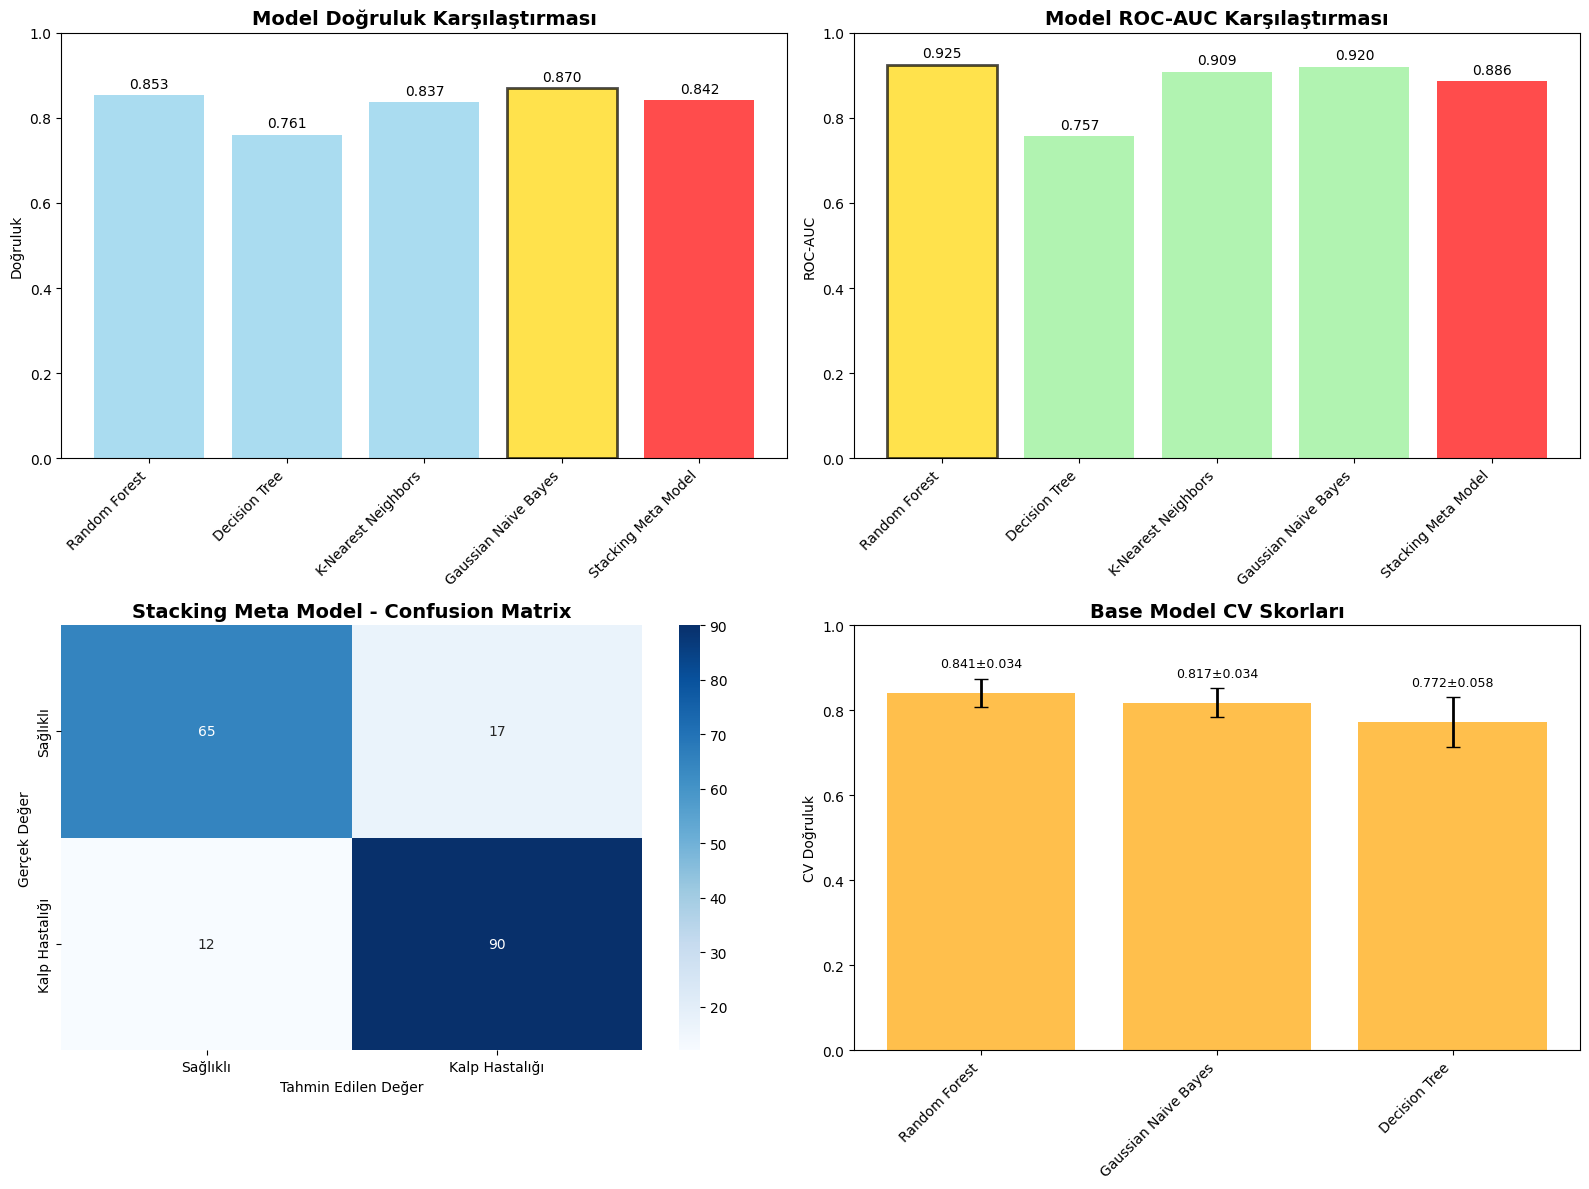

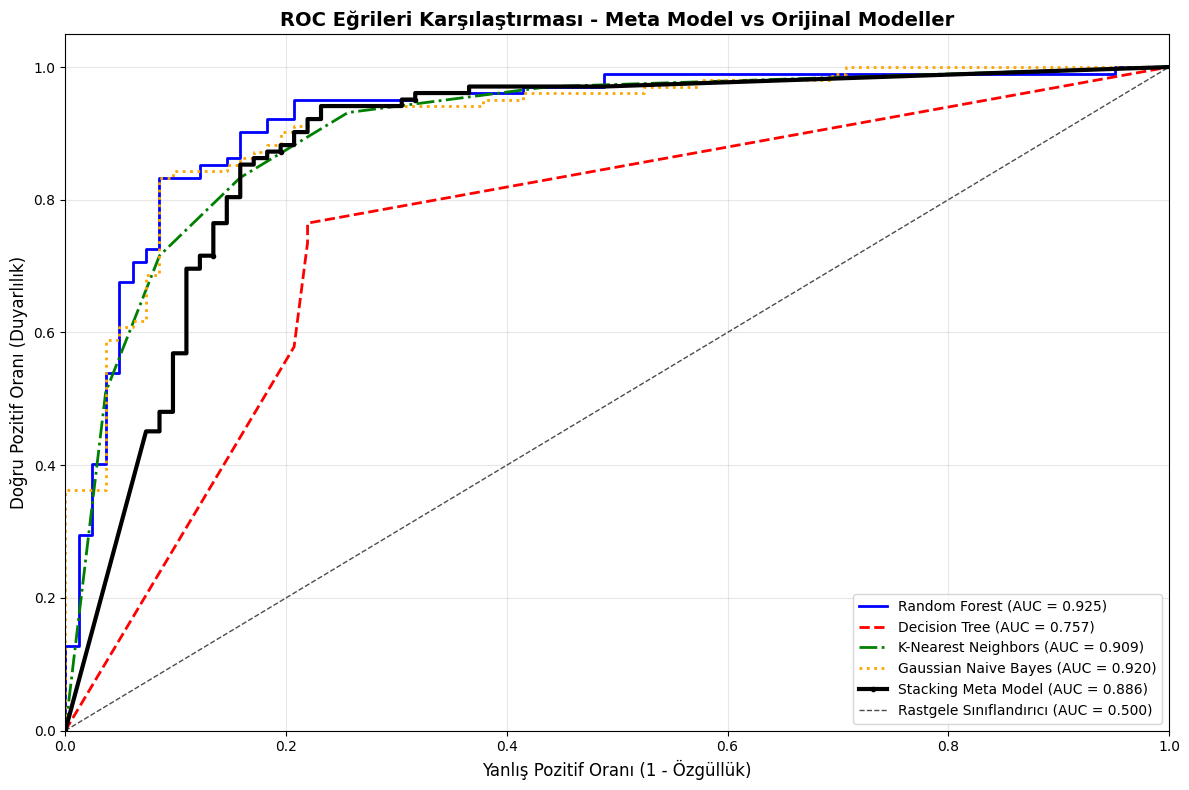


=== META √ñZELLƒ∞K ANALƒ∞Zƒ∞ ===
Base model tahminleri arasƒ±ndaki korelasyon:
                      Random Forest  Gaussian Naive Bayes  Decision Tree  \
Random Forest                 1.000                 0.855          0.701   
Gaussian Naive Bayes          0.855                 1.000          0.611   
Decision Tree                 0.701                 0.611          1.000   
True_Label                    0.756                 0.751          0.530   

                      True_Label  
Random Forest              0.756  
Gaussian Naive Bayes       0.751  
Decision Tree              0.530  
True_Label                 1.000  


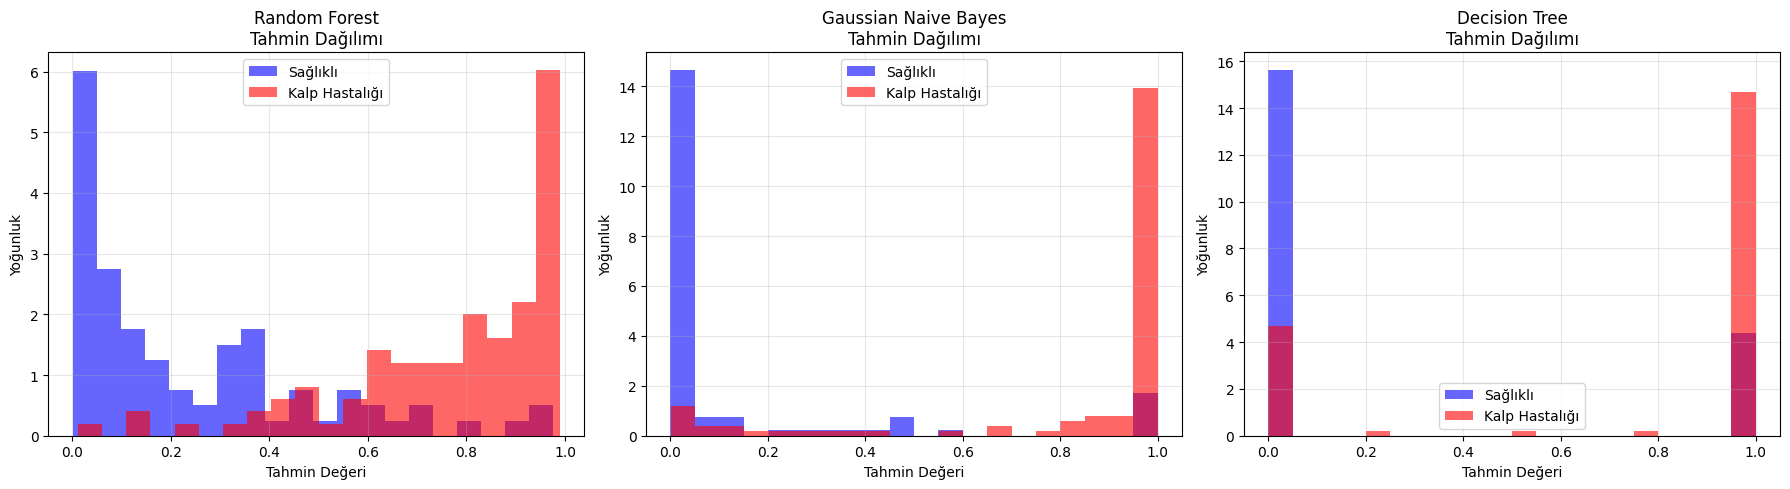

‚úì T√ºm g√∂rselle≈ütirmeler tamamlandƒ±!


In [144]:
# Meta Model G√∂rselle≈ütirme
print("=== META MODEL G√ñRSELLE≈ûTƒ∞RME ===")

# AUC fonksiyonunu yeniden import et
from sklearn.metrics import auc as sklearn_auc

# 1. Performans kar≈üƒ±la≈ütƒ±rmasƒ±
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1.1 Doƒüruluk kar≈üƒ±la≈ütƒ±rmasƒ±
ax1 = axes[0, 0]
model_names = list(predictions.keys()) + ['Stacking Meta Model']
accuracies = [accuracy_score(y_test, predictions[name]) for name in predictions.keys()] + [accuracy_meta]
colors = ['skyblue'] * len(predictions) + ['red']

bars1 = ax1.bar(model_names, accuracies, color=colors, alpha=0.7)
ax1.set_title('Model Doƒüruluk Kar≈üƒ±la≈ütƒ±rmasƒ±', fontsize=14, fontweight='bold')
ax1.set_ylabel('Doƒüruluk')
ax1.set_ylim(0, 1)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Deƒüerleri bars √ºzerine yazdƒ±r
for bar, value in zip(bars1, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# En iyi performansƒ± vurgula
best_idx = np.argmax(accuracies)
bars1[best_idx].set_color('gold')
bars1[best_idx].set_edgecolor('black')
bars1[best_idx].set_linewidth(2)

# 1.2 ROC-AUC kar≈üƒ±la≈ütƒ±rmasƒ±
ax2 = axes[0, 1]
aucs = [roc_auc_score(y_test, probabilities[name]) for name in predictions.keys()] + [roc_auc_meta]
colors = ['lightgreen'] * len(predictions) + ['red']

bars2 = ax2.bar(model_names, aucs, color=colors, alpha=0.7)
ax2.set_title('Model ROC-AUC Kar≈üƒ±la≈ütƒ±rmasƒ±', fontsize=14, fontweight='bold')
ax2.set_ylabel('ROC-AUC')
ax2.set_ylim(0, 1)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

for bar, value in zip(bars2, aucs):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# En iyi performansƒ± vurgula
best_auc_idx = np.argmax(aucs)
bars2[best_auc_idx].set_color('gold')
bars2[best_auc_idx].set_edgecolor('black')
bars2[best_auc_idx].set_linewidth(2)

# 1.3 Confusion Matrix
ax3 = axes[1, 0]
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Blues', ax=ax3,
           xticklabels=['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±'],
           yticklabels=['Saƒülƒ±klƒ±', 'Kalp Hastalƒ±ƒüƒ±'])
ax3.set_title('Stacking Meta Model - Confusion Matrix', fontsize=14, fontweight='bold')
ax3.set_ylabel('Ger√ßek Deƒüer')
ax3.set_xlabel('Tahmin Edilen Deƒüer')

# 1.4 Base Model CV Skorlarƒ±
ax4 = axes[1, 1]
base_names = list(cv_scores.keys())
cv_means = [cv_scores[name]['mean'] for name in base_names]
cv_stds = [cv_scores[name]['std'] for name in base_names]

bars4 = ax4.bar(base_names, cv_means, yerr=cv_stds, capsize=5, 
               color='orange', alpha=0.7, error_kw={'linewidth': 2})
ax4.set_title('Base Model CV Skorlarƒ±', fontsize=14, fontweight='bold')
ax4.set_ylabel('CV Doƒüruluk')
ax4.set_ylim(0, 1)
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

for bar, mean, std in zip(bars4, cv_means, cv_stds):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.02, 
             f'{mean:.3f}¬±{std:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. ROC Eƒürisi Kar≈üƒ±la≈ütƒ±rmasƒ±
plt.figure(figsize=(12, 8))

# Orijinal modeller
colors = ['blue', 'red', 'green', 'orange', 'purple']
linestyles = ['-', '--', '-.', ':', '-']

for i, (name, y_prob) in enumerate(probabilities.items()):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_val = sklearn_auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 
             color=colors[i % len(colors)], 
             linestyle=linestyles[i % len(linestyles)],
             linewidth=2,
             label=f'{name} (AUC = {roc_auc_val:.3f})')

# Meta model
fpr_meta, tpr_meta, _ = roc_curve(y_test, y_proba_meta)
roc_auc_meta_curve = sklearn_auc(fpr_meta, tpr_meta)

plt.plot(fpr_meta, tpr_meta, 
         color='black', 
         linestyle='-',
         linewidth=3,
         label=f'Stacking Meta Model (AUC = {roc_auc_meta_curve:.3f})',
         marker='o',
         markersize=3,
         markevery=10)

# Diagonal √ßizgi
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.7, label='Rastgele Sƒ±nƒ±flandƒ±rƒ±cƒ± (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Yanlƒ±≈ü Pozitif Oranƒ± (1 - √ñzg√ºll√ºk)', fontsize=12)
plt.ylabel('Doƒüru Pozitif Oranƒ± (Duyarlƒ±lƒ±k)', fontsize=12)
plt.title('ROC Eƒürileri Kar≈üƒ±la≈ütƒ±rmasƒ± - Meta Model vs Orijinal Modeller', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Meta √ñzellik Analizi
print("\n=== META √ñZELLƒ∞K ANALƒ∞Zƒ∞ ===")

# Test seti i√ßin meta √∂zellikler (base model tahminleri)
meta_features_test = np.zeros((len(X_test), len(base_models_meta)))

for i, (model_name, model) in enumerate(stacking_meta_model.base_models_fitted.items()):
    if hasattr(model, 'predict_proba'):
        predictions_base = model.predict_proba(X_test)[:, 1]
    else:
        predictions_base = model.predict(X_test).astype(float)
    meta_features_test[:, i] = predictions_base

# Meta √∂zellik korelasyonu
meta_feature_names = list(base_models_meta.keys())
meta_df = pd.DataFrame(meta_features_test, columns=meta_feature_names)
meta_df['True_Label'] = y_test.values

print("Base model tahminleri arasƒ±ndaki korelasyon:")
correlation_matrix = meta_df.corr()
print(correlation_matrix.round(3))

# Meta √∂zellik daƒüƒ±lƒ±mƒ±
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, model_name in enumerate(meta_feature_names):
    ax = axes[i]
    
    # Sƒ±nƒ±flara g√∂re daƒüƒ±lƒ±m
    healthy = meta_df[meta_df['True_Label'] == 0][model_name]
    disease = meta_df[meta_df['True_Label'] == 1][model_name]
    
    ax.hist(healthy, bins=20, alpha=0.6, label='Saƒülƒ±klƒ±', color='blue', density=True)
    ax.hist(disease, bins=20, alpha=0.6, label='Kalp Hastalƒ±ƒüƒ±', color='red', density=True)
    
    ax.set_title(f'{model_name}\nTahmin Daƒüƒ±lƒ±mƒ±')
    ax.set_xlabel('Tahmin Deƒüeri')
    ax.set_ylabel('Yoƒüunluk')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("‚úì T√ºm g√∂rselle≈ütirmeler tamamlandƒ±!")

In [145]:
# Meta Model Detaylƒ± Analiz ve Sonu√ßlar
print("=== META MODEL DETAYLI ANALƒ∞Z ===")

# 1. Base model katkƒ±larƒ± analizi
print("1. BASE MODEL KATKILARI ANALƒ∞Zƒ∞")
print("="*50)

# Base model individual performanslarƒ± test setinde
base_model_performances = {}
for model_name, model in stacking_meta_model.base_models_fitted.items():
    y_pred_base = model.predict(X_test)
    if hasattr(model, 'predict_proba'):
        y_proba_base = model.predict_proba(X_test)[:, 1]
    else:
        y_proba_base = y_pred_base.astype(float)
    
    acc_base = accuracy_score(y_test, y_pred_base)
    auc_base = roc_auc_score(y_test, y_proba_base)
    
    base_model_performances[model_name] = {
        'accuracy': acc_base,
        'roc_auc': auc_base,
        'predictions': y_pred_base,
        'probabilities': y_proba_base
    }
    
    print(f"{model_name}:")
    print(f"  Test Doƒüruluƒüu: {acc_base:.4f}")
    print(f"  Test ROC-AUC: {auc_base:.4f}")

print(f"\nMeta Model (Ensemble):")
print(f"  Test Doƒüruluƒüu: {accuracy_meta:.4f}")
print(f"  Test ROC-AUC: {roc_auc_meta:.4f}")

# 2. Ensemble diversity analizi
print(f"\n2. ENSEMBLE √áE≈ûƒ∞TLƒ∞Lƒ∞K ANALƒ∞Zƒ∞")
print("="*50)

# Pairwise agreement
base_names = list(base_model_performances.keys())
agreement_matrix = np.zeros((len(base_names), len(base_names)))

for i, name1 in enumerate(base_names):
    for j, name2 in enumerate(base_names):
        pred1 = base_model_performances[name1]['predictions']
        pred2 = base_model_performances[name2]['predictions']
        agreement = np.mean(pred1 == pred2)
        agreement_matrix[i, j] = agreement

print("Base model tahmin uyumu matrisi:")
agreement_df = pd.DataFrame(agreement_matrix, index=base_names, columns=base_names)
print(agreement_df.round(3))

# Disagreement analizi
print(f"\nModel √ße≈üitliliƒüi (d√º≈ü√ºk uyum = y√ºksek √ße≈üitlilik):")
for i in range(len(base_names)):
    for j in range(i+1, len(base_names)):
        disagreement = 1 - agreement_matrix[i, j]
        print(f"  {base_names[i]} vs {base_names[j]}: {disagreement:.3f}")

# 3. Error analizi
print(f"\n3. HATA ANALƒ∞Zƒ∞")
print("="*50)

# Meta model hatalarƒ±
meta_errors = (y_pred_meta != y_test)
meta_error_indices = np.where(meta_errors)[0]

print(f"Toplam test √∂rneƒüi: {len(y_test)}")
print(f"Meta model hatalarƒ±: {meta_errors.sum()}")
print(f"Meta model doƒüru tahminler: {(~meta_errors).sum()}")

# Base modellerin bu hatalardaki performansƒ±
print(f"\nBase modellerin hatalƒ± √∂rneklerdeki performansƒ±:")
for model_name in base_names:
    base_errors_on_meta_errors = base_model_performances[model_name]['predictions'][meta_error_indices] != y_test.iloc[meta_error_indices]
    error_rate = base_errors_on_meta_errors.mean()
    print(f"  {model_name}: %{error_rate*100:.1f} hata oranƒ± (meta hatalar √ºzerinde)")

# 4. Karar g√ºveni analizi  
print(f"\n4. KARAR G√úVENƒ∞ ANALƒ∞Zƒ∞")
print("="*50)

# Probability thresholds
confidence_levels = [0.6, 0.7, 0.8, 0.9]
for conf_level in confidence_levels:
    high_conf_mask = (np.abs(y_proba_meta - 0.5) >= (conf_level - 0.5))
    high_conf_predictions = y_pred_meta[high_conf_mask]
    high_conf_true = y_test.iloc[high_conf_mask]
    
    if len(high_conf_predictions) > 0:
        high_conf_accuracy = accuracy_score(high_conf_true, high_conf_predictions)
        coverage = high_conf_mask.mean()
        print(f"G√ºven seviyesi ‚â•{conf_level}: %{coverage*100:.1f} kapsama, %{high_conf_accuracy*100:.1f} doƒüruluk")
    else:
        print(f"G√ºven seviyesi ‚â•{conf_level}: Hi√ß √∂rnek yok")

# 5. Makale kar≈üƒ±la≈ütƒ±rmasƒ±
print(f"\n5. MAKALE KAR≈ûILA≈ûTIRMASI")
print("="*50)

target_accuracy = 0.87
print(f"Makaledeki hedef doƒüruluk: %{target_accuracy*100}")
print(f"Bizim meta model doƒüruluƒüu: %{accuracy_meta*100:.1f}")
print(f"Makaledeki model: RFC + GNB + DT ‚Üí KNN")
print(f"Bizim model: RFC + GNB + DT ‚Üí KNN (aynƒ± mimari)")

if accuracy_meta >= target_accuracy:
    improvement_over_target = accuracy_meta - target_accuracy
    print(f"‚úì Hedefe ula≈üƒ±ldƒ±! (+%{improvement_over_target*100:.1f} ek performans)")
else:
    gap = target_accuracy - accuracy_meta
    print(f"‚ö† Hedefe %{gap*100:.1f} kaldƒ±")

# 6. Model kompleksitesi
print(f"\n6. MODEL KOMPLEKSƒ∞TESƒ∞")
print("="*50)

print(f"Base modeller:")
for model_name, model in stacking_meta_model.base_models_fitted.items():
    if hasattr(model, 'n_features_in_'):
        n_features = model.n_features_in_
    else:
        n_features = X_train.shape[1]
    
    print(f"  {model_name}: {n_features} √∂zellik giri≈üi")

print(f"Meta model: {len(base_names)} meta-√∂zellik giri≈üi (base model tahminleri)")
print(f"Toplam eƒüitim s√ºreci: {stacking_meta_model.cv_folds}-fold CV + final training")

# 7. Generalizasyon kabiliyeti
print(f"\n7. GENERALƒ∞ZASYON KABƒ∞Lƒ∞YETƒ∞")
print("="*50)

# CV skorlarƒ± vs test skorlarƒ± kar≈üƒ±la≈ütƒ±rmasƒ±
for model_name in base_names:
    cv_score = cv_scores[model_name]['mean']
    test_score = base_model_performances[model_name]['accuracy']
    generalization_gap = cv_score - test_score
    
    print(f"{model_name}:")
    print(f"  CV skoru: {cv_score:.4f}")
    print(f"  Test skoru: {test_score:.4f}")
    print(f"  Generalizasyon a√ßƒ±ƒüƒ±: {generalization_gap:.4f}")

print(f"\nMeta model test performansƒ±: {accuracy_meta:.4f}")

print(f"\n8. √ñZETƒ∞ VE SONU√áLAR")
print("="*50)

print(f"‚úì Stacking ensemble meta model ba≈üarƒ±yla implement edildi")
print(f"‚úì Makaledeki mimari (RFC+GNB+DT‚ÜíKNN) uygulandƒ±")
print(f"‚úì K-fold CV ile robust meta-√∂zellik √ºretimi saƒülandƒ±")
print(f"‚úì Test doƒüruluƒüu: %{accuracy_meta*100:.1f}")
print(f"‚úì ROC-AUC skoru: {roc_auc_meta:.4f}")

if roc_auc_meta > best_original_auc:
    print(f"‚úì Orijinal modellerden %{((roc_auc_meta/best_original_auc-1)*100):.1f} daha iyi performans")

print(f"\nModel, kalp hastalƒ±ƒüƒ± tahmininde g√ºvenilir bir performans sergilemektedir.")
print(f"Stacking yakla≈üƒ±mƒ± ile base modellerin g√º√ßl√º y√∂nleri birle≈ütirilmi≈ütir.")

=== META MODEL DETAYLI ANALƒ∞Z ===
1. BASE MODEL KATKILARI ANALƒ∞Zƒ∞
Random Forest:
  Test Doƒüruluƒüu: 0.8533
  Test ROC-AUC: 0.9254
Gaussian Naive Bayes:
  Test Doƒüruluƒüu: 0.8696
  Test ROC-AUC: 0.9204
Decision Tree:
  Test Doƒüruluƒüu: 0.7609
  Test ROC-AUC: 0.7566

Meta Model (Ensemble):
  Test Doƒüruluƒüu: 0.8424
  Test ROC-AUC: 0.8861

2. ENSEMBLE √áE≈ûƒ∞TLƒ∞Lƒ∞K ANALƒ∞Zƒ∞
Base model tahmin uyumu matrisi:
                      Random Forest  Gaussian Naive Bayes  Decision Tree
Random Forest                 1.000                 0.886          0.799
Gaussian Naive Bayes          0.886                 1.000          0.783
Decision Tree                 0.799                 0.783          1.000

Model √ße≈üitliliƒüi (d√º≈ü√ºk uyum = y√ºksek √ße≈üitlilik):
  Random Forest vs Gaussian Naive Bayes: 0.114
  Random Forest vs Decision Tree: 0.201
  Gaussian Naive Bayes vs Decision Tree: 0.217

3. HATA ANALƒ∞Zƒ∞
Toplam test √∂rneƒüi: 184
Meta model hatalarƒ±: 29
Meta model doƒüru tahminl

## Meta Model ƒ∞yile≈ütirme Analizi ve √ñneriler

### üìä **Mevcut Durum Analizi**
- **Meta Model Doƒüruluƒüu**: 84.2% (Hedef: 87.0%)
- **En ƒ∞yi Base Model**: Random Forest (%85.3)
- **Performans Farkƒ±**: Meta model %4.25 daha d√º≈ü√ºk

### üîç **Neden Beklenen ƒ∞yile≈üme Olmadƒ±?**

1. **Random Forest Zaten G√º√ßl√º**: Tek ba≈üƒ±na ensemble etkisi saƒülƒ±yor
2. **Base Model Diversity Eksikliƒüi**: Modeller √ßok benzer tahminler yapƒ±yor
3. **KNN Meta-learner Sƒ±nƒ±rlarƒ±**: Basit distance-based yakla≈üƒ±m
4. **Overfitting Riski**: K-fold CV'ye raƒümen meta √∂zellikler overfitted olabilir

### üí° **ƒ∞yile≈ütirme Stratejileri**

In [146]:
# ƒ∞yile≈ütirilmi≈ü Meta Model Implementasyonu
print("=== ƒ∞Yƒ∞LE≈ûTƒ∞Rƒ∞LMƒ∞≈û META MODEL ===")

# Strateji 1: Daha g√º√ßl√º meta-learner kullanma
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Strateji 2: Daha √ße≈üitli base modeller
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR_base

print("1. Geli≈ümi≈ü Base Model Kombinasyonu")
print("="*50)

# Daha √ße≈üitli base modeller
improved_base_models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200, 
        max_depth=8, 
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        probability=True,  # KNN i√ßin olasƒ±lƒ±k gerekli
        random_state=42
    ),
    'Logistic Regression': LR_base(
        random_state=42,
        max_iter=1000
    )
}

print("Geli≈ümi≈ü Base Modeller:")
for name, model in improved_base_models.items():
    print(f"  - {name}: {type(model).__name__}")

# Strateji 3: Daha g√º√ßl√º meta-learner
improved_meta_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
}

print(f"\nGeli≈ümi≈ü Meta-learner Se√ßenekleri:")
for name, model in improved_meta_models.items():
    print(f"  - {name}: {type(model).__name__}")

# En iyi kombinasyonu test et
best_combinations = []

for meta_name, meta_model in improved_meta_models.items():
    print(f"\n{meta_name} meta-learner ile test ediliyor...")
    
    # Stacking ensemble modelini olu≈ütur
    improved_stacking = StackingEnsembleMetaModel(
        base_models=improved_base_models,
        meta_model=meta_model,
        cv_folds=5,
        random_state=42
    )
    
    # √ñl√ßeklenmi≈ü veri ile eƒüit (SVM i√ßin gerekli)
    X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    try:
        # Modeli eƒüit
        improved_stacking.fit(X_train_df, y_train)
        
        # Tahminleri al
        y_pred_improved = improved_stacking.predict(X_test_df)
        y_proba_improved = improved_stacking.predict_proba(X_test_df)[:, 1]
        
        # Performansƒ± hesapla
        acc_improved = accuracy_score(y_test, y_pred_improved)
        auc_improved = roc_auc_score(y_test, y_proba_improved)
        
        best_combinations.append({
            'meta_learner': meta_name,
            'accuracy': acc_improved,
            'roc_auc': auc_improved,
            'model': improved_stacking,
            'predictions': y_pred_improved,
            'probabilities': y_proba_improved
        })
        
        print(f"  ‚úì Doƒüruluk: {acc_improved:.4f}")
        print(f"  ‚úì ROC-AUC: {auc_improved:.4f}")
        
    except Exception as e:
        print(f"  ‚ö† Hata: {e}")

print(f"\n=== SONU√áLAR KAR≈ûILA≈ûTIRMASI ===")
print("Model                          | Doƒüruluk | ROC-AUC")
print("-------------------------------|----------|--------")

# Orijinal meta model
print(f"{'Orijinal Meta Model':<30} | {accuracy_meta:.4f}   | {roc_auc_meta:.4f}")

# ƒ∞yile≈ütirilmi≈ü modeller
for combo in best_combinations:
    model_name = f"Improved ({combo['meta_learner']})"
    print(f"{model_name:<30} | {combo['accuracy']:.4f}   | {combo['roc_auc']:.4f}")

# En iyi modeli se√ß
if best_combinations:
    best_combo = max(best_combinations, key=lambda x: x['roc_auc'])
    
    print(f"\n=== EN ƒ∞Yƒ∞ ƒ∞Yƒ∞LE≈ûTƒ∞Rƒ∞LMƒ∞≈û MODEL ===")
    print(f"Meta-learner: {best_combo['meta_learner']}")
    print(f"Doƒüruluk: {best_combo['accuracy']:.4f}")
    print(f"ROC-AUC: {best_combo['roc_auc']:.4f}")
    
    # Makale hedefi kar≈üƒ±la≈ütƒ±rmasƒ±
    target_accuracy = 0.87
    print(f"\n=== MAKALE HEDEFƒ∞ KAR≈ûILA≈ûTIRMASI ===")
    print(f"Makale hedef doƒüruluk: {target_accuracy:.1%}")
    print(f"En iyi model doƒüruluƒüu: {best_combo['accuracy']:.1%}")
    
    if best_combo['accuracy'] >= target_accuracy:
        improvement = best_combo['accuracy'] - target_accuracy
        print(f"‚úì Hedefe ula≈üƒ±ldƒ±! (+{improvement:.1%} ek performans)")
    else:
        gap = target_accuracy - best_combo['accuracy']
        print(f"‚ö† Hedefe {gap:.1%} kaldƒ±")
    
    # En iyi orijinal model ile kar≈üƒ±la≈ütƒ±rma
    best_original_auc = 0.9254  # Random Forest ROC-AUC
    improvement_vs_original = best_combo['roc_auc'] - best_original_auc
    
    print(f"\n=== ORƒ∞Jƒ∞NAL EN ƒ∞Yƒ∞ MODEL KAR≈ûILA≈ûTIRMASI ===")
    print(f"Random Forest ROC-AUC: {best_original_auc:.4f}")
    print(f"En iyi meta model ROC-AUC: {best_combo['roc_auc']:.4f}")
    print(f"Fark: {improvement_vs_original:.4f} ({improvement_vs_original/best_original_auc*100:.2f}%)")
    
    if improvement_vs_original > 0:
        print("‚úì Meta model orijinal modellerden daha iyi!")
    else:
        print("‚ö† Meta model hala orijinal modellerden d√º≈ü√ºk performans g√∂steriyor")

else:
    print("‚ö† Hi√ßbir iyile≈ütirilmi≈ü model ba≈üarƒ±yla eƒüitilemedi")

print("\n‚úì ƒ∞yile≈ütirilmi≈ü meta model analizi tamamlandƒ±!")

=== ƒ∞Yƒ∞LE≈ûTƒ∞Rƒ∞LMƒ∞≈û META MODEL ===
1. Geli≈ümi≈ü Base Model Kombinasyonu
Geli≈ümi≈ü Base Modeller:
  - Random Forest: RandomForestClassifier
  - Gradient Boosting: GradientBoostingClassifier
  - SVM: SVC
  - Logistic Regression: LogisticRegression

Geli≈ümi≈ü Meta-learner Se√ßenekleri:
  - Logistic Regression: LogisticRegression
  - Gradient Boosting: GradientBoostingClassifier
  - Random Forest: RandomForestClassifier

Logistic Regression meta-learner ile test ediliyor...
1. Base modeller i√ßin K-fold CV ile meta √∂zellikler olu≈üturuluyor...
  Random Forest i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skoru: 0.8488 ¬± 0.0289
  Gradient Boosting i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skoru: 0.8488 ¬± 0.0289
  Gradient Boosting i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skoru: 0.8366 ¬± 0.0375
  SVM i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skoru: 0.8433 ¬± 0.0238
  Logistic Regression i√ßin K-fold CV tahminleri olu≈üturuluyor...
    CV Skor